In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import masterarbeit_style
import sklearn
from pypalettes import load_cmap
# Festlegen der Farben
cmap = load_cmap("Apricot")

# Preparation of the Time Prediction Analysis Data
Die vorliegenden Daten eignen sich so noch nicht für eine Analyse, es müssen noch einige Vorverarbeitungsschritte durchgeführt werden:
- Datumsformat angleichen
- Spaltenbezichnungen der genutzen Spalten angleichen
- Datensätze zu einem Dataframe zusammenfügen
- für stündliche Analyse Werte ohne Uhrzeit löschen
- Daten zusammenfassen zu 
    - Anrufen/Stunde -> df_hourly
    - Anrufen/Tag -> df_daily
- Duplikate anhand des hashes entfernen

In [25]:
# Load Timestamp of Dataset
path = "C:/Users/ChiaraVogt/Desktop/Masterarbeit/DatenLigue180/"
d2014 = pd.read_csv(path + "ligue180-2014.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2015 = pd.read_csv(path + "ligue180-2015.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2016 = pd.read_csv(path + "ligue180-2016.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2017 = pd.read_csv(path + "ligue180-2017.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2018 = pd.read_csv(path + "ligue180-2018.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2018_2 = pd.read_csv(path + "ligue180-nov-2018.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2019 = pd.read_csv(path + "ligue180-2019.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2020 = pd.read_csv(path + "ligue180-primeiro-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_da_denúncia'])
d2020_2 = pd.read_csv(path + "ligue180-segundo-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2021 = pd.read_csv(path + "ligue180-primeiro-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2021_2 = pd.read_csv(path + "ligue180-segundo-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2022 = pd.read_csv(path + "ligue180-primeiro-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2022_2 = pd.read_csv(path + "ligue180-segundo-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro'])
d2023 = pd.read_csv(path + "ligue180-primeiro-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro'])
d2023_2 = pd.read_csv(path + "ligue180-segundo-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro'])

# Timestamp angleichen
d2014['data_atendimento'] = pd.to_datetime(d2014['data_atendimento'], dayfirst = True)
d2015['data_atendimento'] = pd.to_datetime(d2015['data_atendimento'])
d2016['data_atendimento'] = pd.to_datetime(d2016['data_atendimento'], dayfirst = True)
d2017['data_atendimento'] = pd.to_datetime(d2017['data_atendimento'])
d2018['data_atendimento'] = pd.to_datetime(d2018['data_atendimento'])
d2018_2['data_atendimento'] = pd.to_datetime(d2018_2['data_atendimento'])
d2019['data_atendimento'] = pd.to_datetime(d2019['data_atendimento'])
d2020['Data_da_denúncia'] = pd.to_datetime(d2020['Data_da_denúncia'], dayfirst = True)
d2020_2['Data de cadastro'] = pd.to_datetime(d2020_2['Data de cadastro'], dayfirst = True)
d2021['Data de cadastro'] = pd.to_datetime(d2021['Data de cadastro'], dayfirst = True)
d2021_2['Data de cadastro'] = pd.to_datetime(d2021_2['Data de cadastro'], dayfirst = True)
d2022['Data de cadastro'] = pd.to_datetime(d2022['Data de cadastro'], dayfirst = True)
d2022_2['Data_de_cadastro'] = pd.to_datetime(d2022_2['Data_de_cadastro'], dayfirst = True)
d2023['Data_de_cadastro'] = pd.to_datetime(d2023['Data_de_cadastro'], dayfirst = True)
d2023_2['Data_de_cadastro'] = pd.to_datetime(d2023_2['Data_de_cadastro'], dayfirst = True)

# Spaltennamen angleichen
d2014 = d2014.rename(columns = {'data_atendimento' : 'date'})
d2015 = d2015.rename(columns = {'data_atendimento' : 'date'})
d2016 = d2016.rename(columns = {'data_atendimento' : 'date'})
d2017 = d2017.rename(columns = {'data_atendimento' : 'date'})
d2018 = d2018.rename(columns = {'data_atendimento' : 'date'})
d2018_2 = d2018_2.rename(columns = {'data_atendimento' : 'date'})
d2019 = d2019.rename(columns = {'data_atendimento' : 'date'})
d2020 = d2020.rename(columns = {'Data_da_denúncia' : 'date'})
d2020_2 = d2020_2.rename(columns = {'Data de cadastro' : 'date'})
d2021 = d2021.rename(columns = {'Data de cadastro' : 'date'})
d2021_2 = d2021_2.rename(columns = {'Data de cadastro' : 'date'})
d2022 = d2022.rename(columns = {'Data de cadastro' : 'date'})
d2022_2 = d2022_2.rename(columns = {'Data_de_cadastro' : 'date'})
d2023 = d2023.rename(columns = {'Data_de_cadastro' : 'date'})
d2023_2 = d2023_2.rename(columns = {'Data_de_cadastro' : 'date'})

# Zeitreihen zu Datensatz verbinden
data_call_all = pd.concat([d2014, d2015, d2016, d2017, d2018, d2018_2, d2019, d2020, d2020_2, d2021, d2021_2, d2022, d2022_2, d2023, d2023_2], ignore_index = True)
data_call_all.set_index('date', inplace=True)
data_call_all

C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_10448\1793333336.py:20: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  d2014['data_atendimento'] = pd.to_datetime(d2014['data_atendimento'], dayfirst = True)
C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_10448\1793333336.py:22: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  d2016['data_atendimento'] = pd.to_datetime(d2016['data_atendimento'], dayfirst = True)
C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_10448\1793333336.py:34: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  d2023_2['Data_de_cadastro'] = pd.to_datetime(d2023_2['Data_de_cadastro'], dayfirst = True)


""
date
2014-01-17 00:00:00.000
2014-01-17 00:00:00.000
2014-01-17 00:00:00.000
2014-01-17 00:00:00.000
2014-01-01 00:00:00.000
...
2023-10-18 21:22:34.883
2023-09-27 08:20:05.077
2023-07-01 10:31:44.750


Vermutlich gibt es einige Daten bei denen die Uhrzeit nicht festgehalten ist und alle Daten des Tages auf 00:00:00 datiert sind. Diese Werte sind für die Tagesanalyse hilfreich, verfälschen jedoch die Ergebnisse der Stunden. Deshalb werden für alle Berechnungen mit Stunden diese Werte herausgefiltert. 

In [26]:
# Filtern der Einträge, bei denen die Uhrzeit nicht 00:00:00 ist
data_call_all_hourly = data_call_all[data_call_all.index.time != pd.Timestamp('00:00:00').time()]
data_call_all_hourly.shape

(1811098, 0)

In [27]:
# Verarbeiten der Datensätze in calls/hour (df_hourly) und calls/day (df_daily)
df_hourly = data_call_all_hourly.resample('h').size().reset_index(name='calls')
df_hourly.set_index('date', inplace=True)
df_daily = data_call_all.resample('d').size().reset_index(name='calls')
df_daily.set_index('date', inplace=True)

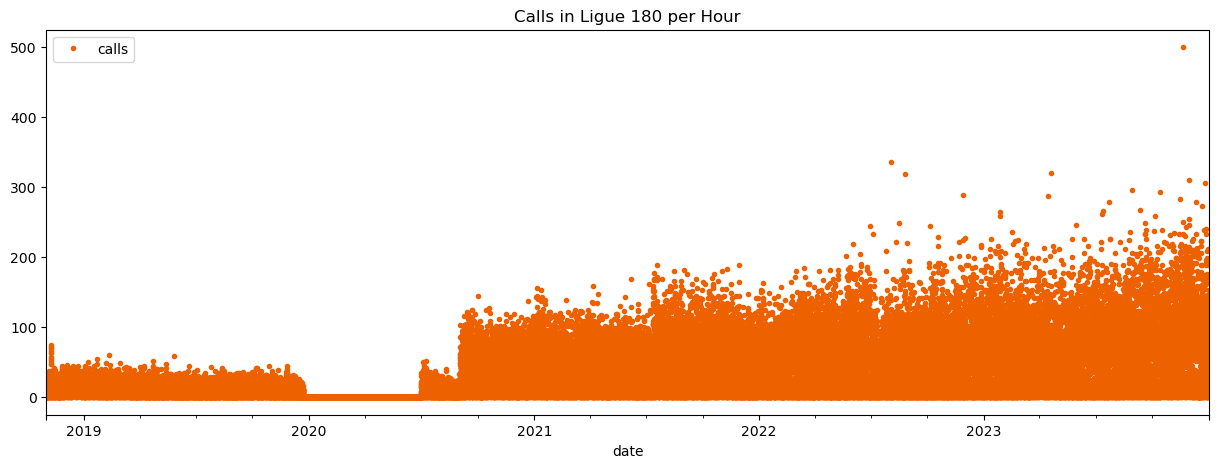

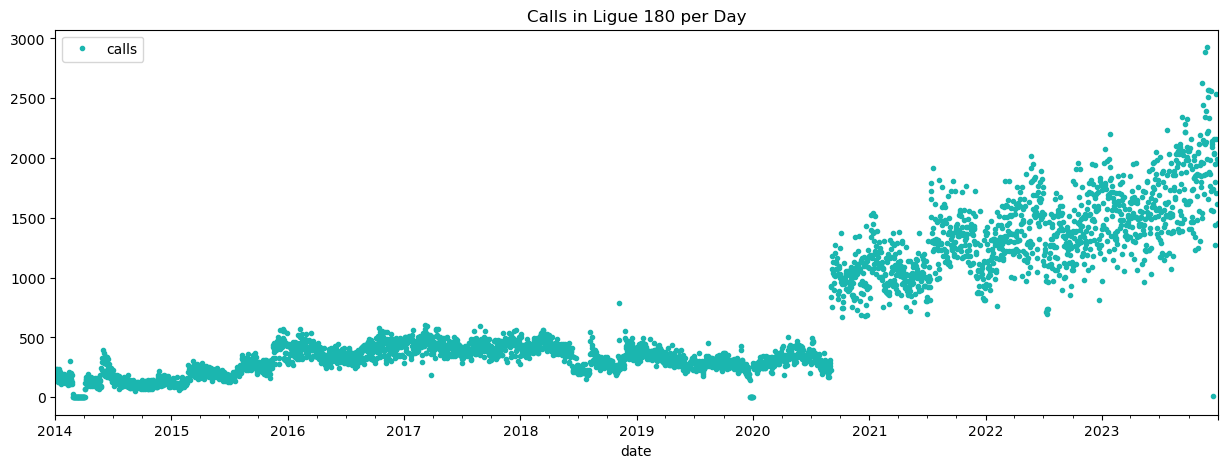

In [90]:
df_hourly.plot(style='.', color = cmap.colors[1], figsize=(15,5), title='Calls in Ligue 180 per Hour')
plt.show()
df_daily.plot(style='.', color = cmap.colors[3], figsize=(15,5), title='Calls in Ligue 180 per Day')
plt.show()

## Remove Duplicates
*hash*-Column existiert in Datensatz von 2020 bis 2023. Der gleiche *hash* existiert teilweise mehrmals:

In [29]:
# Load Timestamp of Dataset
path = "C:/Users/ChiaraVogt/Desktop/Masterarbeit/DatenLigue180/"
d2020 = pd.read_csv(path + "ligue180-primeiro-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_da_denúncia', 'hash_par_vitima_suspeito'])
d2020_2 = pd.read_csv(path + "ligue180-segundo-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2021 = pd.read_csv(path + "ligue180-primeiro-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2021_2 = pd.read_csv(path + "ligue180-segundo-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2022 = pd.read_csv(path + "ligue180-primeiro-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2022_2 = pd.read_csv(path + "ligue180-segundo-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro', 'hash'])
d2023 = pd.read_csv(path + "ligue180-primeiro-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro', 'hash'])
d2023_2 = pd.read_csv(path + "ligue180-segundo-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro', 'hash'])

# Timestamp angleichen
d2020['Data_da_denúncia'] = pd.to_datetime(d2020['Data_da_denúncia'], dayfirst = True)
d2020_2['Data de cadastro'] = pd.to_datetime(d2020_2['Data de cadastro'], dayfirst = True)
d2021['Data de cadastro'] = pd.to_datetime(d2021['Data de cadastro'], dayfirst = True)
d2021_2['Data de cadastro'] = pd.to_datetime(d2021_2['Data de cadastro'], dayfirst = True)
d2022['Data de cadastro'] = pd.to_datetime(d2022['Data de cadastro'], dayfirst = True)
d2022_2['Data_de_cadastro'] = pd.to_datetime(d2022_2['Data_de_cadastro'], dayfirst = True)
d2023['Data_de_cadastro'] = pd.to_datetime(d2023['Data_de_cadastro'], dayfirst = True)
d2023_2['Data_de_cadastro'] = pd.to_datetime(d2023_2['Data_de_cadastro'], dayfirst = True)

# Spaltennamen angleichen
d2020 = d2020.rename(columns = {'Data_da_denúncia' : 'date', 'hash_par_vitima_suspeito' : 'hash'})
d2020_2 = d2020_2.rename(columns = {'Data de cadastro' : 'date'})
d2021 = d2021.rename(columns = {'Data de cadastro' : 'date'})
d2021_2 = d2021_2.rename(columns = {'Data de cadastro' : 'date'})
d2022 = d2022.rename(columns = {'Data de cadastro' : 'date'})
d2022_2 = d2022_2.rename(columns = {'Data_de_cadastro' : 'date'})
d2023 = d2023.rename(columns = {'Data_de_cadastro' : 'date'})
d2023_2 = d2023_2.rename(columns = {'Data_de_cadastro' : 'date'})

# Zeitreihen zu Datensatz verbinden
data_call_hash_all = pd.concat([d2020, d2020_2, d2021, d2021_2, d2022, d2022_2, d2023, d2023_2], ignore_index = True)
data_call_hash_all['date'] = pd.to_datetime(data_call_hash_all['date'], dayfirst = True,format='%Y-%m-%d %H:%M:%S')
data_call_hash_all['date'] = data_call_hash_all['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
data_call_hash_all

C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_10448\1556139116.py:20: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  d2023_2['Data_de_cadastro'] = pd.to_datetime(d2023_2['Data_de_cadastro'], dayfirst = True)


,hash,date
0,00010323A77B85F087CA8A1B2C112DE747F8457FDBDEB3...,2020-04-09 00:00:00
1,00032338AC54195FE631641D894A994D5BEFC2166CFC89...,2020-02-15 00:00:00
2,0004F2CC5E8DDEF13C25B02C425518DBCE2B26AA9F04EC...,2020-06-14 00:00:00
3,00058E648CE71A540BDFBA7DBEF39D514BDC0BBB987296...,2020-03-24 00:00:00
4,0007A93EDC68BD64CC5CE692E301D9B8683538A722A88B...,2020-05-31 00:00:00
...,...,...
1739561,FFFBC0CF3F4AA0883598ACCC6046C5165C9ED9E17757E9...,2023-10-18 21:22:34
1739562,FFFD0901151F35128C4B55D07CA9103D2F015F090D8031...,2023-09-27 08:20:05
1739563,FFFF4F9C351ACC15EE810647565807B57463591F87F316...,2023-07-01 10:31:44
1739564,FFFFC0C82D7103C098D7B59646C6A1DFF6D259ADDB4A95...,2023-12-07 16:19:23


Wie hier schon zu sehen gibt es viele Daten bei denen im Zeitstempel keine Uhrzeit angegeben ist, wegen denen alle Daten des Tages auf 00:00:00 datiert sind. Diese Werte sind für die Tagesanalyse hilfreich, verfälschen jedoch die Ergebnisse der Stunden. Deshalb werden für alle Berechnungen mit Stunden diese Werte herausgefiltert. 

In [30]:
data_call_hash_all['date'] = pd.to_datetime(data_call_hash_all['date'], errors='coerce')
data_call_hash_all.set_index('date', inplace=True)

In [31]:
print(f"Beispiel für Zeitstempel im Index: {data_call_hash_all.index[:5]}")
# Einträge filtern, bei denen die Uhrzeit nicht 00:00:00 ist
data_call_hash_all_hourly = data_call_hash_all[data_call_hash_all.index.time != pd.Timestamp('00:00:00').time()]
data_call_hash_all_hourly.head()

Beispiel für Zeitstempel im Index: DatetimeIndex(['2020-04-09', '2020-02-15', '2020-06-14', '2020-03-24',
               '2020-05-31'],
              dtype='datetime64[ns]', name='date', freq=None)


,hash
date,
2020-07-02 14:18:00,35666ce2a5a539bdb67ab4c0bbc94eff
2020-07-03 20:14:00,38e27ee59745df105461fa4818053355
2020-07-15 19:31:00,30984674c4c0dac02e2ebcd456d41e0c
2020-07-15 14:21:00,4ad777b83c76090c8f2a0caf9e382e00
2020-07-07 17:41:00,3d1f0b2bb714da65b50b6849c61ea487


Im Folgenden werden die mehrmals vorkommenden Hashtags analysiert. Es wird vermutet, dass diese den gleichen Anruf und die gleiche Anzeige betreffen.

In [32]:
hash_counts = data_call_hash_all['hash'].value_counts()
# Dataframe hash_counts soll nur bei mind. 2 value_counts() den hash und die Menge an Vorkomnissen speichern
hash_counts = hash_counts[hash_counts >= 2]
print(hash_counts.head(10))

hash
d2d9664e8a2fb21d0a441753b3532b3a                                    69
AC15EA832A6206870051921C7657119DEB34DD7E24C672D7B0C7514F9E371EC3    62
8A3F1EB84C2612D48ABB28418FF2E81BFD81C8125318C178BA02D7B39182BF2A    62
48CEE01DD6E73A76286D0C5C96E29071668CEBEAFEE5C39D3D49B1B617433D6E    62
F14E6B290167E66FCC0469A51267A0F2F3591FE837F72104D6C9A318A2D16253    62
044FBDC51CCA0AAF96D8D0C738795350DAC073D84564C1ACBE835888E27F8D6E    62
51408d8b591d665bddf34d5aaef59bff                                    50
D7C484B367258B0DD6214ACBAEDB48647B9A0B54307BF72303B9F112CB714AFA    45
674F57F8EBDE018B3255A2565EB332465F5DAE31A6C0FD3695DA91D778844F39    45
f8c2fac27add47c5d7b4a4a46a330c37                                    39
Name: count, dtype: int64


In [33]:
# Summe aller hash die doppelt oder mehr vorkommen
sum_duplicate_entries = hash_counts.sum()
# Gesamtanteil an den Einträgen in data_call_all
total_entries = len(data_call_hash_all)
# Prozentsatz der Einträge, die doppelt oder mehr vorkommen
percent_duplicate_entries = (sum_duplicate_entries / total_entries) * 100
# ab 2014
percent_duplicate_entries_2014 = (sum_duplicate_entries / len(data_call_all)) * 100
# Berechne die Anzahl der einzigartigen Hashes (einen Eintrag pro Hash)
unique_hash_entries = len(data_call_hash_all) - hash_counts.sum() + len(hash_counts)
# Prozentsatz der Einträge, wenn man nur einen Eintrag pro Hash hätte
percent_unique_hash_entries = (unique_hash_entries / total_entries) * 100
# ab 2014
percent_unique_hash_entries_2014 = (unique_hash_entries + (len(data_call_all) - len(data_call_hash_all))) / len(data_call_all) * 100
# Ergebnisse anzeigen
print(f"Summe aller Einträge: {len(data_call_all)}")
print(f"Summe der Einträge, die doppelt oder mehr vorkommen: {sum_duplicate_entries}")
print(f"Menge aller Einträge (2020-2023): {len(data_call_hash_all)}")
print(f"Anzahl der hash, die nicht mehrfach vorkommen: {len(data_call_hash_all)-sum_duplicate_entries}")
print(f"Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2020-2023): {percent_duplicate_entries:.2f}%")
print(f"Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2014-2023): {percent_duplicate_entries_2014:.2f}%")
print(f"Summe aller Einträge, ohne Duplikate: {len(data_call_all) - len(data_call_hash_all) + unique_hash_entries}")
print(f"Anzahl der einzigartigen Hashes (jeweils ein Eintrag): {unique_hash_entries}")
print(f"Prozentualer Anteil des Menge der Einträge (2020-2023) bei Entfernen der Duplikate: {percent_unique_hash_entries:.2f}%")
print(f"Prozentualer Anteil des Menge der Einträge (2014-2023) bei Entfernen der Duplikate: {percent_unique_hash_entries_2014:.2f}%")

Summe aller Einträge: 2406097
Summe der Einträge, die doppelt oder mehr vorkommen: 1649615
Menge aller Einträge (2020-2023): 1739566
Anzahl der hash, die nicht mehrfach vorkommen: 89951
Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2020-2023): 94.83%
Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2014-2023): 68.56%
Summe aller Einträge, ohne Duplikate: 1069407
Anzahl der einzigartigen Hashes (jeweils ein Eintrag): 402876
Prozentualer Anteil des Menge der Einträge (2020-2023) bei Entfernen der Duplikate: 23.16%
Prozentualer Anteil des Menge der Einträge (2014-2023) bei Entfernen der Duplikate: 44.45%


Es sind sehr viele hashs die sehr häufig vorkommen. Ein erster Blick in die Daten lässt vermuten, dass es sich um die gleiche Anzeige oder um die gleichen Personen  handelt, da auch die Zeit die gleiche ist. Im folgenden werden die hashs im Gesamtdatensatz stichprobenartig untersucht.  

In [34]:
# Import aller Daten, um zu prüfen, ob der gleiche Hashtag die gleiche Anzeige sein könnte
data_all_2020 = pd.read_csv("data_all_2020.csv")

C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_10448\2856916606.py:2: DtypeWarning: Columns (4,8,20,21,33,35,36,37,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all_2020 = pd.read_csv("data_all_2020.csv")


In [35]:
# Erster Hash-Wert aus hash_counts
first_hash = hash_counts.index[0]
print(f"Hash: {first_hash}")

# Alle Zeilen in data_all_2020 mit diesem Hash-Wert
matching_rows = data_all_2020[data_all_2020['hash'] == first_hash]

# Erste gefundene Zeile mit allen Variablen
first_match = matching_rows.iloc[0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("\nErster Treffer mit allen Variablen:")
        print(first_match)

# Überprüfen, ob alle anderen Spalten für diesen Hash identische Werte haben
# Zeilen vergleichen
differences = matching_rows.drop(columns=['hash']).nunique()

# Unterschiede ausgeben (Spalten, in denen unterschiedliche Werte vorkommen)
differing_columns = differences[differences > 1]

if differing_columns.empty:
    print("\nAlle Zeilen mit dem Hash haben identische Werte in allen anderen Spalten.")
else:
    print("\nUnterschiede gefunden in folgenden Spalten:")
    for col in differing_columns.index:
        unique_values = matching_rows[col].unique()
        print(f"Spalte '{col}': Unterschiedliche Werte = {unique_values}")


Hash: d2d9664e8a2fb21d0a441753b3532b3a

Erster Treffer mit allen Variablen:
Unnamed: 0                                                                                   857387
hash                                                               d2d9664e8a2fb21d0a441753b3532b3a
Data_de_cadastro                                                                2022-06-17 09:34:00
Denunciante                                                                                 ANÔNIMO
relacao_demandante_vitima                                                                       NaN
Canal_de_atendimento                                                                     TELEFÔNICO
País_da_vítima                                                                               BRASIL
UF                                                                                               MG
Estado                                                                                          NaN
Município               

In [36]:
hash_table = matching_rows.copy()
hash_table

,Unnamed: 0,hash,Data_de_cadastro,Denunciante,relacao_demandante_vitima,Canal_de_atendimento,País_da_vítima,UF,Estado,Município,...,Suspeito_preso,UF_do_suspeito,sl_suspeito_municipio,Profissão_do_suspeito,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia
857387,857387,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
857394,857394,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
857395,857395,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
857400,857400,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
857403,857403,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878628,878628,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
880009,880009,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
880018,880018,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D
880024,880024,d2d9664e8a2fb21d0a441753b3532b3a,2022-06-17 09:34:00,ANÔNIMO,NaN,TELEFÔNICO,BRASIL,MG,NaN,BOM SUCESSO,...,N/D,MG,BOM SUCESSO,CONSELHEIRO TUTELAR,N/D,N/D,NaN,N/D,N/D,N/D


hash[0]: d2d9664e8a2fb21d0a441753b3532b3a  
Unterschiede in  
- violacao: 'INTEGRIDADE>PATRIMONIAL>INDIVIDUAL' 
    - 'INTEGRIDADE>FÍSICA>MAUS TRATOS'
    - 'INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO'
    - 'INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO'
- Motivacao:
    - viele verschiedene Anschuldigungen
- Profissão_do_suspeito:
    - CONSELHEIRO TUTELAR
    -> dadurch, dass dieser Wert immer der gleiche ist, lässt es darauf schließen, dass es sich um einen Menschen oder eine "Arbeitsgemeinschaft" handelt, der/die in mehreren Aspekten ihr Amt missbraucht hat/haben

Auch bei hash[1]: AC15EA832A6206870051921C7657119DEB34DD7E24C672D7B0C7514F9E371EC3  
zeigt sich dass das Arbeitsfeld des Beschuldigten immer das gleiche ist: PODER EXECUTIVO EM GERAL - MUNICIPAL
auch hier ist der Zeitstempel der gleiche. 
Hier gibt es viele Unterschiede in der Spalte violacao, jedoch sind es Straftaten, die "zusammenpassen", wie z.B.  
- 'LIBERDADE>SEXUAL>FÍSICA>ESTUPRO' -> Vergewaltigung
- 'INTEGRIDADE>FÍSICA>MAUS TRATOS' -> physische Misshandlung
- 'LIBERDADE>SEXUAL>FÍSICA>ABUSO SEXUAL FÍSICO' -> physischer sexueller Übergriff
- 'LIBERDADE>DIREITOS INDIVIDUAIS>STALKING' -> Stalking
TODO
Bei hash[10]: CDBEF147F8BFD6E6D63535DE2B51465DD58C6E089A43BE30AD77AAF6C13C8081  
handelt es sich um eine andere Situation. Hier zeigt eine dritte Person, jemanden an, der/die sich zu verschiedenen Personen schlecht verhalten hat:  
Spalte 'Cenário_da_violação': Unterschiedliche Werte = ['CASA ONDE RESIDE A VÍTIMA E O SUSPEITO' 'OUTROS']  
Spalte 'Gênero_da_vítima': Unterschiedliche Werte = ['FEMININO' 'MASCULINO']  
Spalte 'Faixa_etária_da_vítima': Unterschiedliche Werte = [**'25 A 29 ANOS' '06 ANOS' '12 ANOS' '05 ANOS'**]  
Spalte 'Raça_Cor_da_vítima': Unterschiedliche Werte = ['PARDA' 'PRETA']  
Spalte 'Relação_vítima_suspeito': Unterschiedliche Werte = [**'COMPANHEIRO(A)' 'MÃE' 'VIZINHO(A)'**]  
Spalte 'violacao': Unterschiedliche Werte = ['INTEGRIDADE>FÍSICA>MAUS TRATOS' 'INTEGRIDADE>FÍSICA>TORTURA FÍSICA'  
 'INTEGRIDADE>FÍSICA>OUTROS' 'DIREITOS SOCIAIS>SAÚDE'  
 'INTEGRIDADE>FÍSICA>ABANDONO'  
 'INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE'  
 'INTEGRIDADE>PSÍQUICA>EXPOSIÇÃO'  
 'INTEGRIDADE>FÍSICA>AGRESSÃO ou VIAS DE FATO'  
 'INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO'  
 'INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA' 'INTEGRIDADE>NEGLIGÊNCIA'  
 'DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA'  
 'INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO' 'DIREITOS SOCIAIS>SEGURANÇA']  
Spalte 'Motivação': Unterschiedliche Werte = [nan 'MOTIVAÇÃO.EM RAZÃO DA CONDIÇÃO SOCIAL' 'OUTRO(S) ELEMENTO(S)']  
Spalte 'Frequência': Unterschiedliche Werte = ['DIARIAMENTE' 'SEMANALMENTE']  
Spalte 'Início_das_violações': Unterschiedliche Werte = ['HÁ MAIS DE UM ANO' 'HÁ MAIS DE SEIS MESES']  
Spalte 'UF_da_vítima': Unterschiedliche Werte = ['BA' 'DENUNCIANTE NÃO SOUBE INFORMAR']  
Spalte 'Município_da_vítima': Unterschiedliche Werte = ['291360 | ILHÉUS' 'DENUNCIANTE NÃO SOUBE INFORMAR']  

In [37]:
if 'date' in data_call_hash_all.columns:
    data_call_hash_all.set_index('date', inplace=True)

# Hashes, die mehr als einmal vorkommen
duplicate_hashes = data_call_hash_all['hash'].value_counts()
duplicate_hashes = duplicate_hashes[duplicate_hashes > 1].index
# 3. Filtern der Zeilen, die doppelte Hashes enthalten
duplicate_rows = data_call_hash_all[data_call_hash_all['hash'].isin(duplicate_hashes)]
# Prüfen, ob alle Zeitstempel innerhalb der Gruppen gleich sind
different_timestamp_rows = duplicate_rows.groupby('hash').filter(
    lambda x: len(x.index.unique()) > 1  # Prüfen auf unterschiedliche Zeitstempel im Index
)
print(different_timestamp_rows)
data_call_hash_all.head(5)

Empty DataFrame
Columns: [hash]
Index: []


,hash
date,
2020-04-09,00010323A77B85F087CA8A1B2C112DE747F8457FDBDEB3...
2020-02-15,00032338AC54195FE631641D894A994D5BEFC2166CFC89...
2020-06-14,0004F2CC5E8DDEF13C25B02C425518DBCE2B26AA9F04EC...
2020-03-24,00058E648CE71A540BDFBA7DBEF39D514BDC0BBB987296...
2020-05-31,0007A93EDC68BD64CC5CE692E301D9B8683538A722A88B...


In [38]:
# Neuer Dataframe ohne Duplikate
data_call_nodupl = data_call_hash_all.drop_duplicates(subset='hash', keep='first')
print(data_call_nodupl.head(5))
# Überprüfen, ob Menge der Ergebnisse gleich berechneter Menge von Einträgen ist
print(f"\nErwartete Anzahl der einzigartigen Hashes (jeweils ein Eintrag): {unique_hash_entries}")
print(f"Tatsächliche Anzahl der einzigartigen Hashes (jeweils ein Eintrag): {len(data_call_nodupl)}")

                                                         hash
date                                                         
2020-04-09  00010323A77B85F087CA8A1B2C112DE747F8457FDBDEB3...
2020-02-15  00032338AC54195FE631641D894A994D5BEFC2166CFC89...
2020-06-14  0004F2CC5E8DDEF13C25B02C425518DBCE2B26AA9F04EC...
2020-03-24  00058E648CE71A540BDFBA7DBEF39D514BDC0BBB987296...
2020-05-31  0007A93EDC68BD64CC5CE692E301D9B8683538A722A88B...

Erwartete Anzahl der einzigartigen Hashes (jeweils ein Eintrag): 402876
Tatsächliche Anzahl der einzigartigen Hashes (jeweils ein Eintrag): 402876


In [39]:
# Duplikate für Stunden-Zeitreihe entfernen
data_call_nodupl_hourly = data_call_hash_all_hourly.drop_duplicates(subset='hash', keep='first')
data_call_nodupl_hourly.head(5)

,hash
date,
2020-07-02 14:18:00,35666ce2a5a539bdb67ab4c0bbc94eff
2020-07-03 20:14:00,38e27ee59745df105461fa4818053355
2020-07-15 19:31:00,30984674c4c0dac02e2ebcd456d41e0c
2020-07-15 14:21:00,4ad777b83c76090c8f2a0caf9e382e00
2020-07-07 17:41:00,3d1f0b2bb714da65b50b6849c61ea487


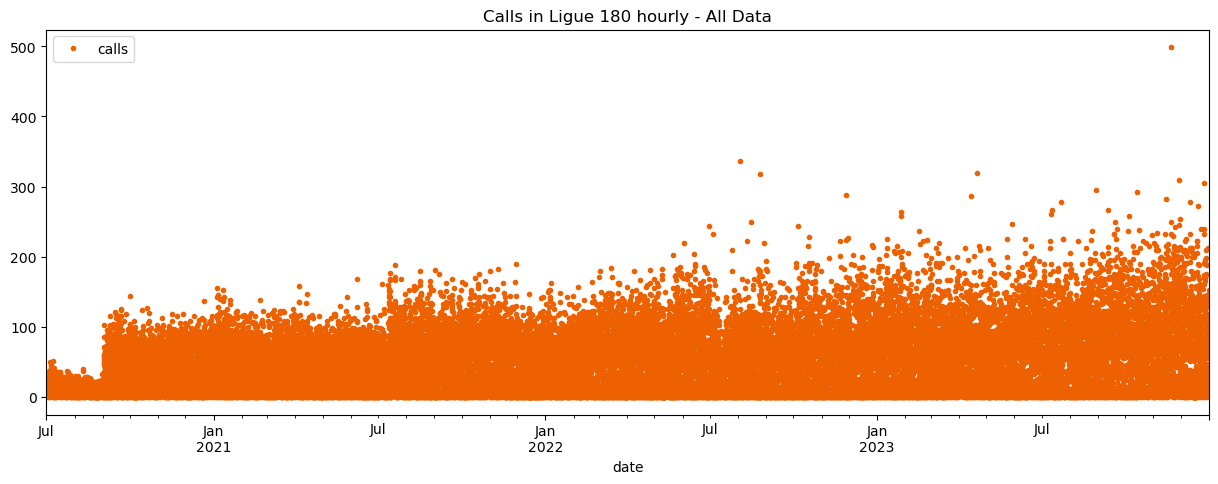

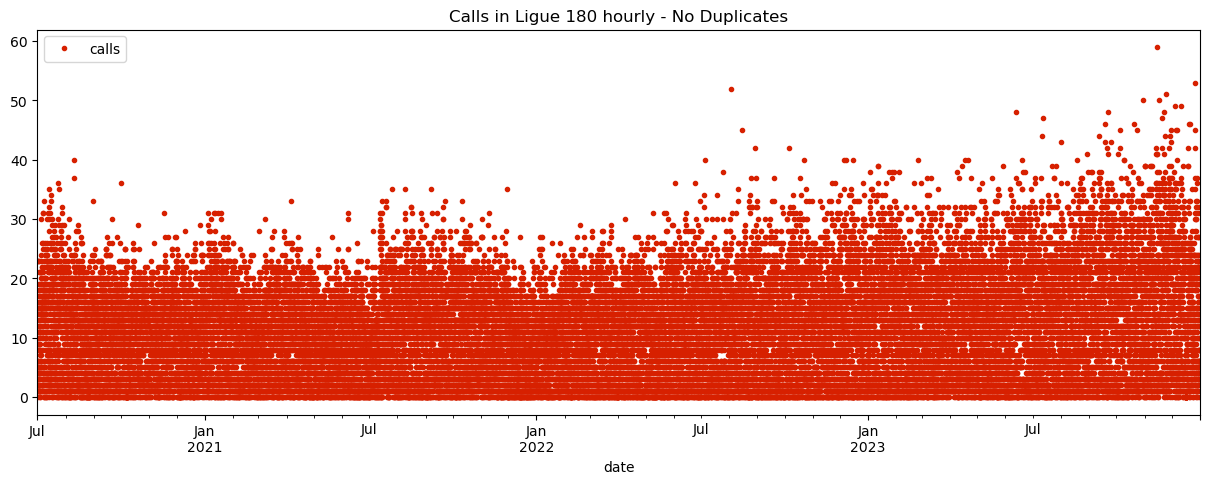

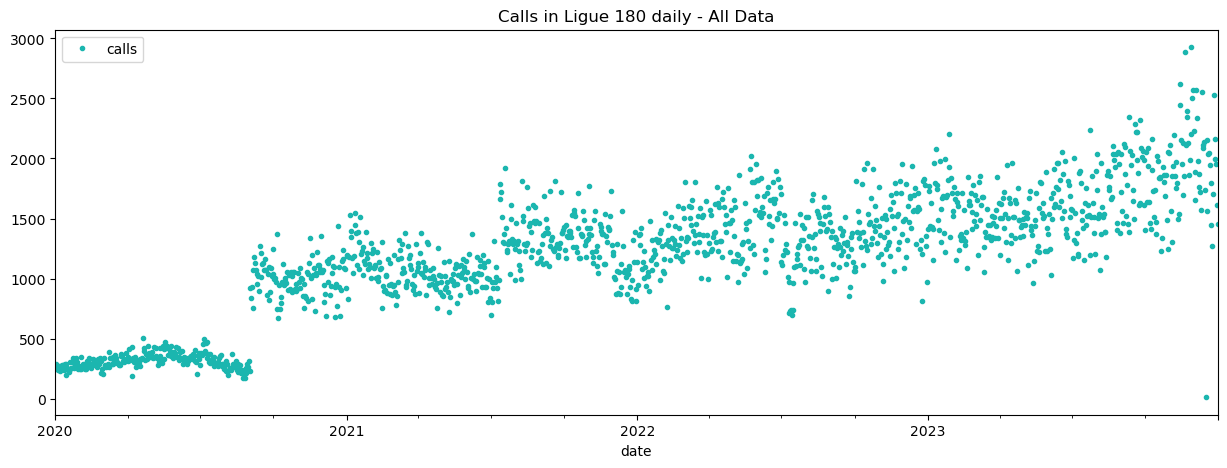

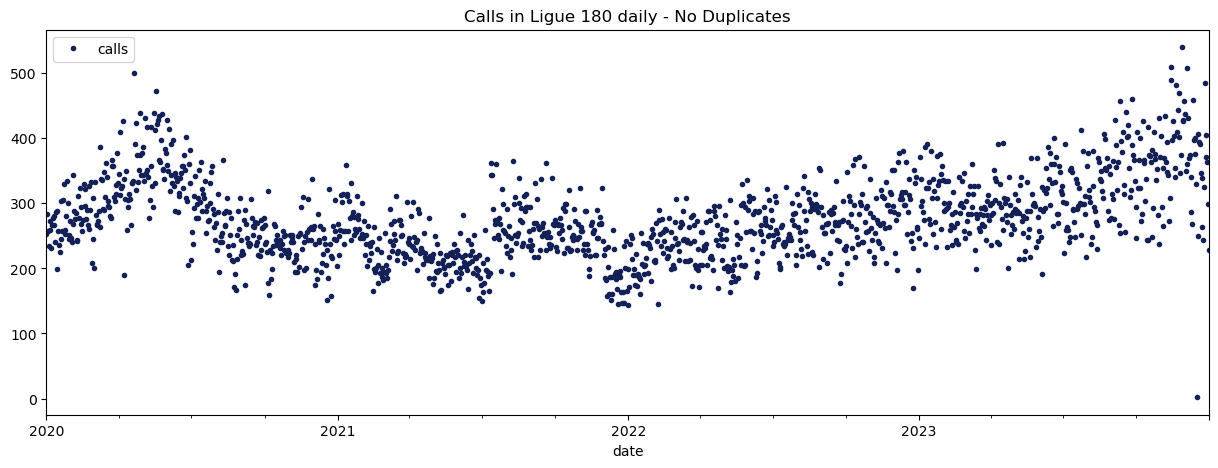

In [88]:
# Erstellen des Dataframes für Time Series Prediction - Ohne Duplikate - 2020 - 2023
df_hourly_nodupl_2020 = data_call_nodupl_hourly.resample('h').size().reset_index(name='calls')
df_hourly_nodupl_2020.set_index('date', inplace=True)
df_daily_nodupl_2020 = data_call_nodupl.resample('d').size().reset_index(name='calls')
df_daily_nodupl_2020.set_index('date', inplace=True)
# Erstellen des Dataframes für Time Series Prediction - Alle Daten - 2020 - 2023
df_hourly_2020 = data_call_hash_all_hourly.resample('h').size().reset_index(name='calls')
df_hourly_2020.set_index('date', inplace=True)
df_daily_2020 = data_call_hash_all.resample('d').size().reset_index(name='calls')
df_daily_2020.set_index('date', inplace=True)
df_hourly_2020.plot(style='.', color = cmap.colors[1], figsize=(15,5), title='Calls in Ligue 180 hourly - All Data')
plt.show()
df_hourly_nodupl_2020.plot(style='.', color = cmap.colors[0], figsize=(15,5), title='Calls in Ligue 180 hourly - No Duplicates')
plt.show()
df_daily_2020.plot(style='.', color = cmap.colors[3], figsize=(15,5), title='Calls in Ligue 180 daily - All Data')
plt.show()
df_daily_nodupl_2020.plot(style='.', color = cmap.colors[5], figsize=(15,5), title='Calls in Ligue 180 daily - No Duplicates')
plt.show()

Gerade im daily-Format zeigt sich, dass die Daten so viel mehr Konsistenz zu den vorherigen Daten haben, weswegen die weiter Verarbeitung ohne die Duplikate stattfinden wird. 

(40926, 1)


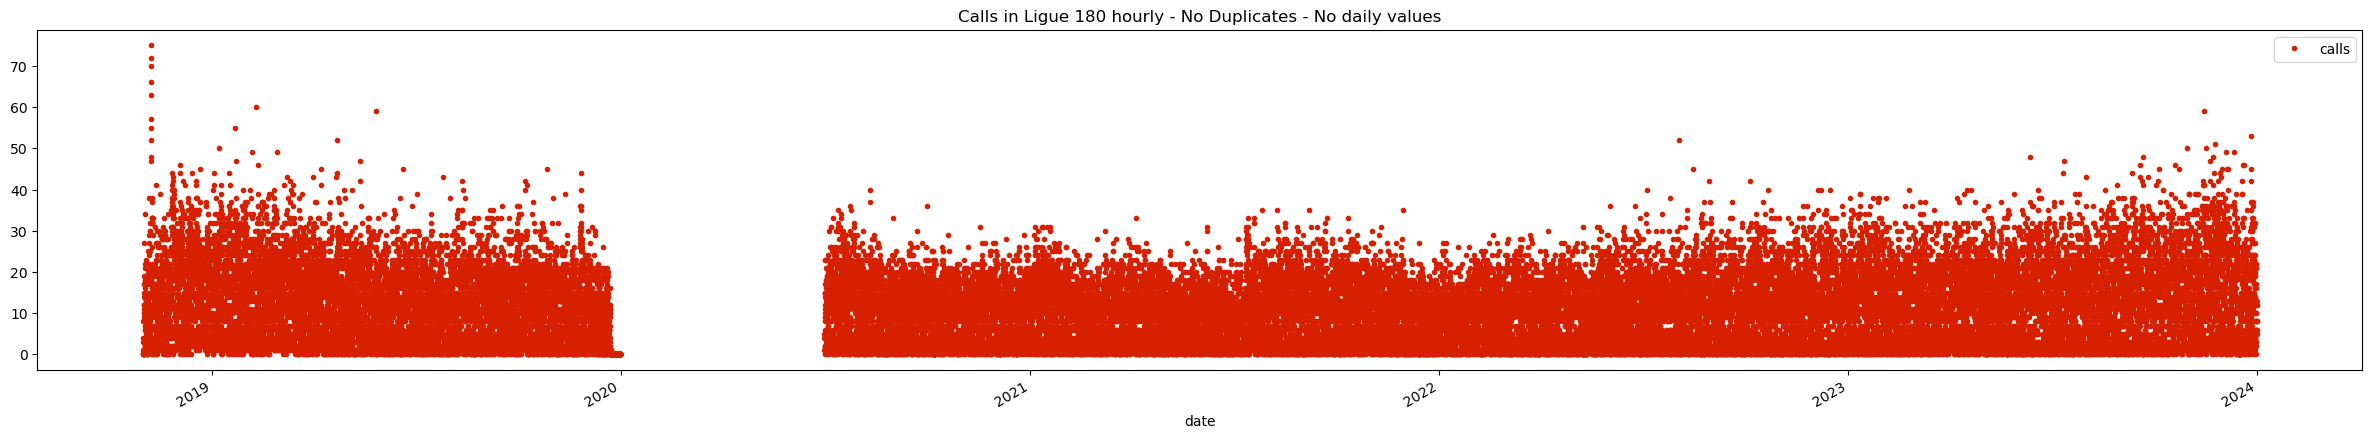

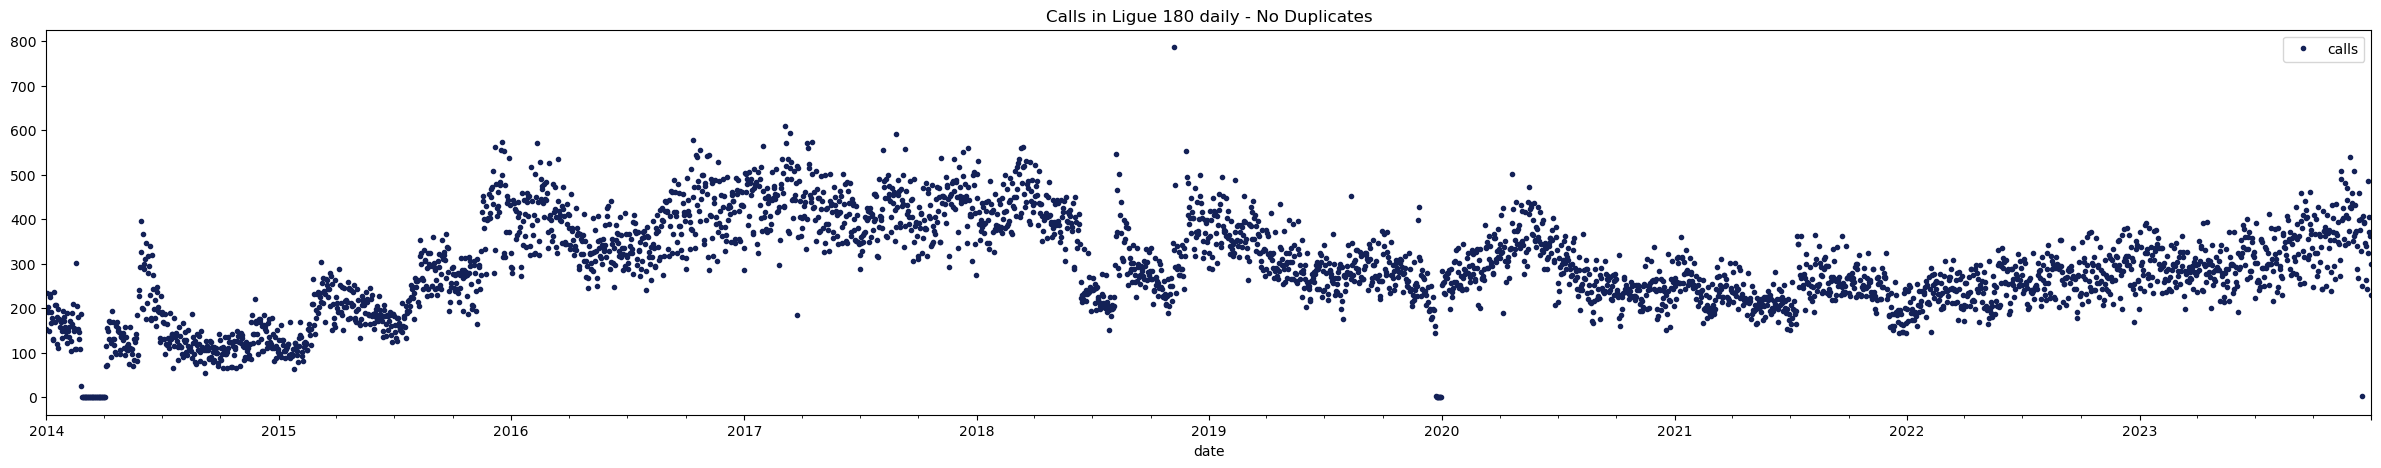

(3652, 1)


In [89]:
# Ersetzen der bereinigten Daten im Gesamtdatensatz
# Für df_hourly
df_hourly_filtered = df_hourly[df_hourly.index <= '2019-12-31 23:59:59']
df_hourly_nodupl = pd.concat([df_hourly_filtered, df_hourly_nodupl_2020])
print(df_hourly_nodupl.shape)
# Für df_daily
df_daily_filtered = df_daily[df_daily.index <= '2019-12-31 23:59:59']
df_daily_nodupl = pd.concat([df_daily_filtered, df_daily_nodupl_2020])
df_hourly_nodupl.plot(style='.', color = cmap.colors[0], figsize=(30,5), title='Calls in Ligue 180 hourly - No Duplicates - No daily values')
plt.show()
df_daily_nodupl.plot(style='.', color = cmap.colors[5], figsize=(30,5), title='Calls in Ligue 180 daily - No Duplicates')
plt.show()
print(df_daily_nodupl.shape)

## Freie Tage hinzufügen

In [42]:
import holidays
from datetime import date
from holidays import Brazil

br_holidays = Brazil(years=[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
df_hourly_nodupl.reset_index(inplace=True)
holidays_list = list(br_holidays.keys())  # Feiertage sind bereits datetime.date-Objekte

# Funktion zum Berechnen des minimalen Abstands zu einem Feiertag
def calculate_days_to_holiday(row_date, holidays):
    if pd.isna(row_date):  # Überprüfen, ob das Datum leer ist
        return None
    
    # Konvertiere row_date in ein date-Objekt, falls es ein Timestamp ist
    row_date = row_date.date() if isinstance(row_date, pd.Timestamp) else row_date
    
    days_to_holidays = [(holiday - row_date).days for holiday in holidays]
    
    if days_to_holidays:  # Überprüfen, ob die Liste nicht leer ist
        return min(days_to_holidays, key=abs)  # Der kleinste absolute Abstand (vorher/nachher)
    else:
        return None  # Falls keine Feiertage vorhanden sind

# Die Abstandsspalte basierend auf den Feiertagen berechnen
df_hourly_nodupl['days_to_holiday'] = df_hourly_nodupl['date'].apply(lambda x: calculate_days_to_holiday(x, holidays_list))

# Ausgabe zur Überprüfung
df_hourly_nodupl.head()

c:\Users\ChiaraVogt\miniconda3\Lib\site-packages\holidays\__init__.py:32: FutureIncompatibilityWarning: 

This is a future version incompatibility warning from Python Holidays library v0.54
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ensure the stability of your projects,
we highly recommend pinning the version of our API that you rely on. You can pin your current
holidays v0.x dependency (e.g., holidays==0.54) or limit it (e.g., holidays<1.0) in order to
avoid potentially unwanted upgrade to the version 1.0 when it's released (ETA 2024Q4 - 2025Q1).

If you have any questions 

,date,calls,days_to_holiday
0,2018-10-31 18:00:00,4,2
1,2018-10-31 19:00:00,1,2
2,2018-10-31 20:00:00,0,2
3,2018-10-31 21:00:00,0,2
4,2018-10-31 22:00:00,0,2


In [43]:
# Feiertagsabstand für df_daily
df_daily_nodupl = df_daily_nodupl.reset_index()
df_daily_nodupl['days_to_holiday'] = df_daily_nodupl['date'].apply(lambda x: calculate_days_to_holiday(x, holidays_list))
df_daily_nodupl.head()

,date,calls,days_to_holiday
0,2014-01-01,153,0
1,2014-01-02,233,-1
2,2014-01-03,203,-2
3,2014-01-04,192,-3
4,2014-01-05,149,-4


## Fehlende Daten für hourly_calls

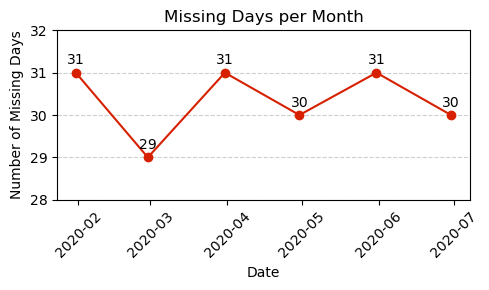

2020-01-31    31
2020-02-29    29
2020-03-31    31
2020-04-30    30
2020-05-31    31
2020-06-30    30
Freq: ME, dtype: int64


In [54]:
def missing_days_per_month_continuous(df):
    # Sicherstellen, dass die 'date'-Spalte als datetime formatiert ist
    df['date'] = pd.to_datetime(df['date'])

    # Liste aller Tage im Zeitraum des DataFrames erstellen
    start_date = df['date'].min().normalize()
    end_date = df['date'].max().normalize()
    all_days = pd.date_range(start=start_date, end=end_date, freq='d')

    # Liste der Tage, die im bereinigten DataFrame fehlen
    cleaned_days = df['date'].dt.normalize().unique()
    missing_days = set(all_days) - set(cleaned_days)

    # Neuer DataFrame mit der Anzahl der fehlenden Tage pro Monat
    missing_days_series = pd.Series(1, index=pd.to_datetime(list(missing_days)))
    missing_days_per_month = missing_days_series.resample('ME').sum().sort_index()

    plt.figure(figsize=(5, 3))
    plt.plot(missing_days_per_month.index, missing_days_per_month, marker='o', color=cmap.colors[0], linestyle='-', label='Missing Days')

    # Werte annotieren
    for i, val in enumerate(missing_days_per_month):
        plt.text(missing_days_per_month.index[i], val + 0.2, str(int(val)), ha='center', fontsize=10)

    plt.title('Missing Days per Month')
    plt.xlabel('Date')
    plt.ylabel('Number of Missing Days')
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
    plt.xticks(rotation=45)
    plt.ylim(28, 32)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return missing_days_per_month

# Beispielaufruf der Funktion
missing_days_summary = missing_days_per_month_continuous(df_hourly_nodupl)
print(missing_days_summary)

Hier ist eine Lücke von einem halben Jahr, was ca. 10 % des Datensatzes entspricht.  
TODO Wie soll mit dieser Lücke umgegangen werden?

## Fehlende Daten für daily_calls

Als erster Schritt wird genau umgrenzt, in welchen Abschnitten Daten fehlen. Fehlende Daten werden anschließend zu NaN-Werten umgewandelt, um sie von der Zahl 0 zu unterscheiden.

In [55]:
null_days = df_daily_nodupl[df_daily_nodupl['calls'] == 0] 
null_days.style

,date,calls,days_to_holiday
56,2014-02-26 00:00:00,0,51
57,2014-02-27 00:00:00,0,50
58,2014-02-28 00:00:00,0,49
59,2014-03-01 00:00:00,0,48
60,2014-03-02 00:00:00,0,47
61,2014-03-03 00:00:00,0,46
62,2014-03-04 00:00:00,0,45
63,2014-03-05 00:00:00,0,44
64,2014-03-06 00:00:00,0,43
65,2014-03-07 00:00:00,0,42


Für die Tage, an denen laut Datensatz keine Anzeigen gemeldet wurden, ist es sehr unwahrscheinlich, dass in dieser Zeit keine Anzeigen über die Hotline stattgefunden haben. Deswegen werden diese Tage mit den Werten als ungültig betrachtet und die '0' durch ein NaN ersetzt, um anschließend nach Atwan (2022, Kapitel 7) verschiedene Auffüllmethoden zu testen. 

In [56]:
# Nullwerte durch NaN ersetzen
df_daily_nodupl['calls'] = df_daily_nodupl['calls'].replace(0, np.nan)
nan_days = df_daily_nodupl[df_daily_nodupl['calls'].isna()]
nan_days.head()

,date,calls,days_to_holiday
56,2014-02-26,NaN,51
57,2014-02-27,NaN,50
58,2014-02-28,NaN,49
59,2014-03-01,NaN,48
60,2014-03-02,NaN,47


In der Analyse wird versucht werden eine Möglichkeit zu schaffen, dass Lücken in dem Datensatz existieren können. Sollte das nicht möglich sein wird in diesem Abschnitt diskutiert, welche Methode möglich wäre, um diese Lücken aufzufüllen.

In [57]:
# Mit der Methode Fillna arbeiten
df_daily_nomissing = df_daily_nodupl.copy()
df_daily_nomissing['calls_ffil'] = df_daily_nomissing['calls'].ffill() # forward fill
df_daily_nomissing['calls_bfill'] = df_daily_nomissing['calls'].bfill() #backward fill
df_daily_nomissing['calls_mean'] = df_daily_nomissing['calls'].fillna(df_daily_nomissing['calls'].mean()) # mean fill
nan_days = df_daily_nomissing[df_daily_nomissing['calls'].isna()]
nan_days.head()

,date,calls,days_to_holiday,calls_ffil,calls_bfill,calls_mean
56,2014-02-26,NaN,51,26.0,70.0,296.481009
57,2014-02-27,NaN,50,26.0,70.0,296.481009
58,2014-02-28,NaN,49,26.0,70.0,296.481009
59,2014-03-01,NaN,48,26.0,70.0,296.481009
60,2014-03-02,NaN,47,26.0,70.0,296.481009


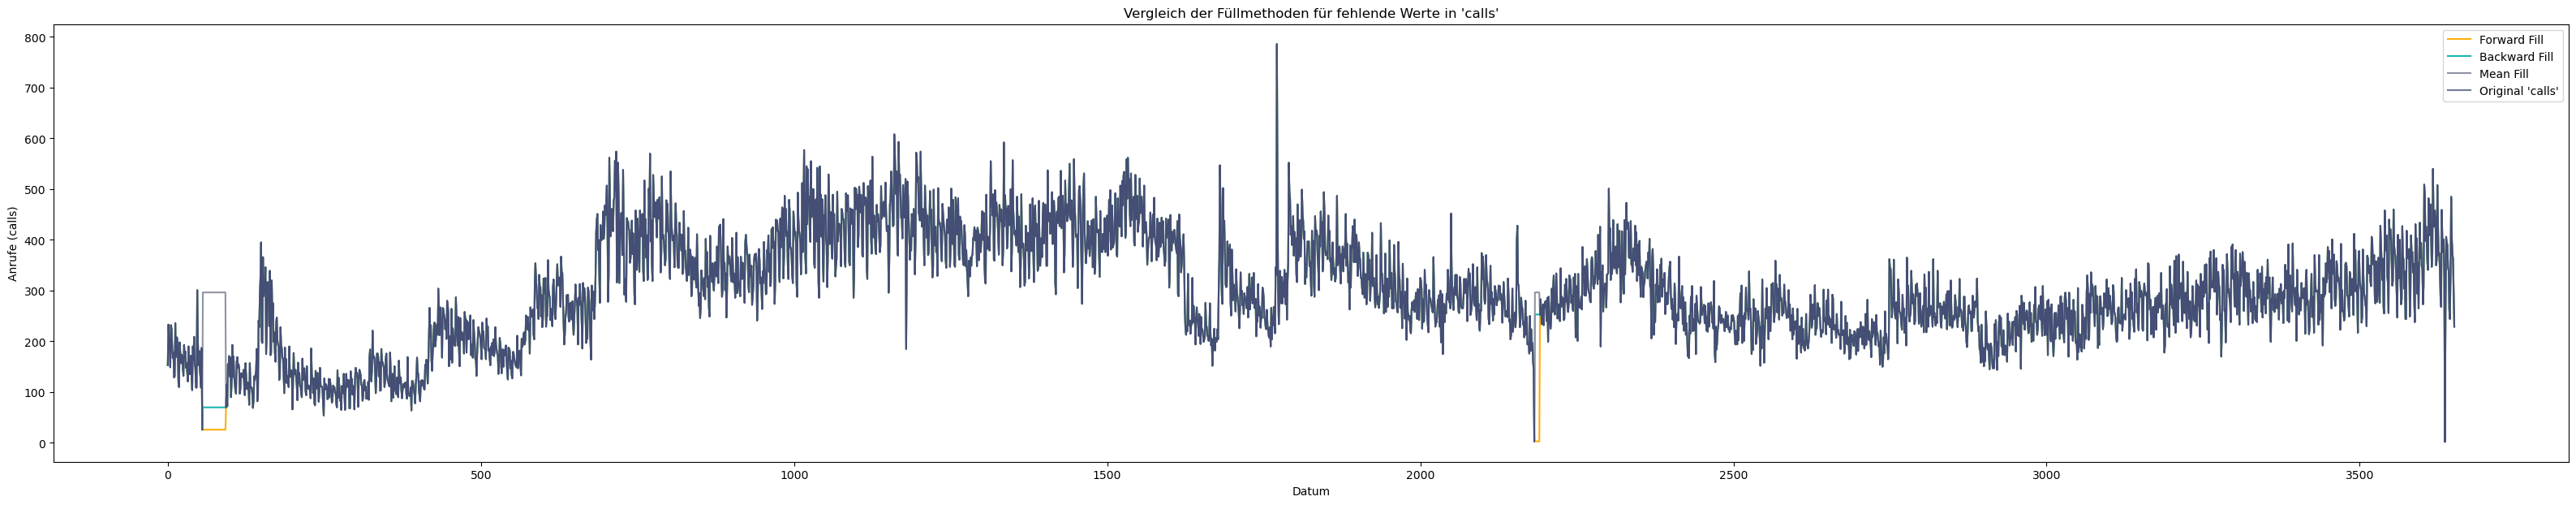

In [72]:
plt.figure(figsize=(40, 7))
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls_ffil'], color=cmap.colors[2], label="Forward Fill")
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls_bfill'], color=cmap.colors[3], label="Backward Fill")
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls_mean'], color=cmap.colors[4], label="Mean Fill")
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls'], color=cmap.colors[5], alpha=0.6, label="Original 'calls'")
plt.xlabel("Datum")
plt.ylabel("Anrufe (calls)")
plt.title("Vergleich der Füllmethoden für fehlende Werte in 'calls'")
plt.legend()
plt.show()

Keine der Auffüllmethoden ist für den Datensatz besonders passend. Gründe dafür können sein, dass nicht nur einzelne Tage aufgefüllt werden müssen sondern längere Zeiträume. Dadurch bilden 'forward fill' mit der übertragung des Wertes von einem Tag davor und 'backward fill' mit der Übertragung des daruffolgenden Wertes (Atwan.2022, Kapitel 7), die fehlenden Daten nicht gut ab. Der Durchschnittswert 'mean fill' bietet ebenfalls kein gutes Ergebnis, da der Zeitraum den es berücksichtigt zu lang ist und daher der Trend des Datensatzes zu großen Einfluss hat.  
  
Im *Time Series Analysis with Python Cookbook* (Atwan.2022, Kapitel 7) werden als nächste Möglichkeit Fill-Methoden aus der scikit-learn-Bibliothek vorgeschlagen: SimpleImputer bietet *mena, median, und most_frequent* an. Diese können jedoch schon aussortiert werden, da diese durch ihre Linearität eher für kurze Zeiträume eignen, wie besoielsweise vier Tage hintereinander, statt einem Zeitraum von einer Woche oder 1,5 Monaten.  
  
Als nächstes werden multivariate Methoden vorgeschlagen, diese scheinen besser geeignet zu sein, da sie die Dynamik des Datensatzes versuchen aufzunehmen und wiederzugeben. Diese werden nun auf den zu betrachtenden Datensatz angewendet.

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

# Bereite die Daten für IterativeImputer vor
estimators = [
    ("extra_trees", ExtraTreesRegressor(n_estimators=10, random_state=15)),
    ("elastic_net", ElasticNet(random_state=15)),
    ("knn", KNeighborsRegressor(n_neighbors=5))
]

# Werte für das Modell als Array erstellen (z.B. Werte der ersten Spalten)
calls_vals = df_daily_nomissing[['calls']].values

# Iteriere über die Schätzer
for e_name, e in estimators:
    imputer = IterativeImputer(estimator=e, random_state=15)
    df_daily_nomissing[f'calls_{e_name}'] = imputer.fit_transform(calls_vals)

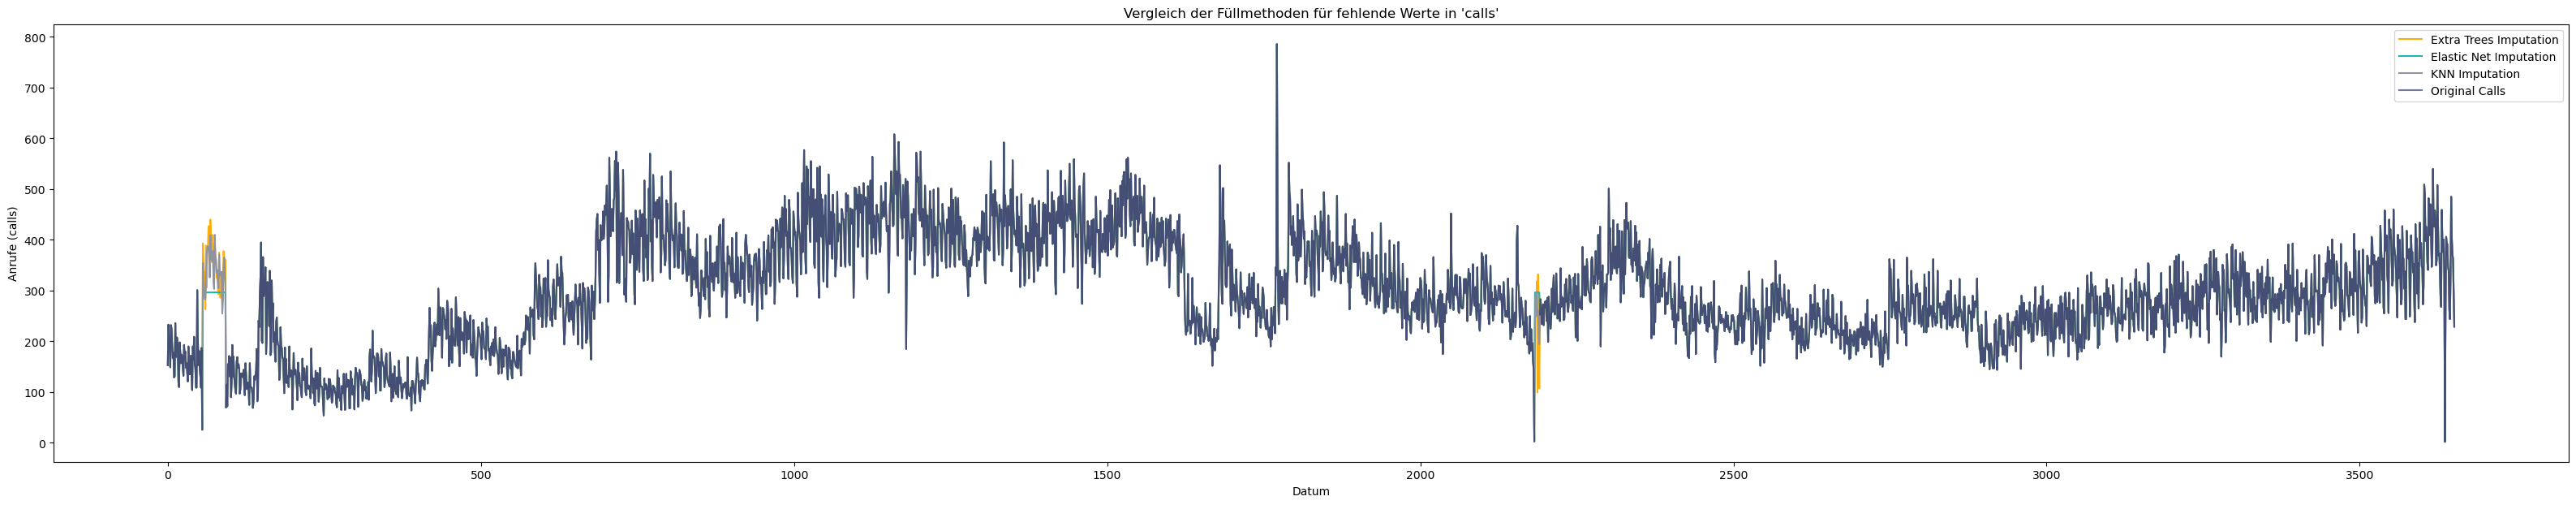

In [73]:
plt.figure(figsize=(40, 7))
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls_extra_trees'], label="Extra Trees Imputation", color=cmap.colors[2])
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls_elastic_net'], label="Elastic Net Imputation", color=cmap.colors[3])
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls_knn'], label="KNN Imputation", color=cmap.colors[4])
plt.plot(df_daily_nomissing.index, df_daily_nomissing['calls'], label="Original Calls", color=cmap.colors[5], alpha=0.6)
plt.xlabel("Datum")
plt.ylabel("Anrufe (calls)")
plt.title("Vergleich der Füllmethoden für fehlende Werte in 'calls'")
plt.legend()
plt.show()

Alle ergeben das gleiche weil es zu wenig Input-Values gibt, deswegen wird jetzt nochmal mit Zeitkomponenten die Werte ergänzt.

In [62]:
df_daily_nomissing['hour'] = df_daily_nomissing['date'].dt.hour
df_daily_nomissing['weekday'] = df_daily_nomissing['date'].dt.weekday
df_daily_nomissing['month'] = df_daily_nomissing['date'].dt.month
df_daily_nomissing['weekofyear'] = df_daily_nomissing['date'].dt.isocalendar().week
df_daily_nomissing['season'] = df_daily_nomissing['month'].apply(lambda x: (x % 12 + 3) // 3)
df_daily_nomissing['year'] = df_daily_nomissing['date'].dt.year

Für alle periodischen Merkmale wandeln wir die Werte in mittels Sinus und Cosinus um, damit bespielsweise bei 'weekday' der Wert 7 die gleiche Entfernung zum 1 wie zu 6 hat (Sonntag hat den gleichen Abstand zu Montag wie zu Samstag).

In [63]:
df_daily_nomissing['sin_month'] = np.sin(2 * np.pi * df_daily_nomissing['month'] / 12)
df_daily_nomissing['cos_month'] = np.cos(2 * np.pi * df_daily_nomissing['month'] / 12)

df_daily_nomissing['sin_weekday'] = np.sin(2 * np.pi * df_daily_nomissing['weekday'] / 7)
df_daily_nomissing['cos_weekday'] = np.cos(2 * np.pi * df_daily_nomissing['weekday'] / 7)

df_daily_nomissing['sin_weekofyear'] = np.sin(2 * np.pi * df_daily_nomissing['weekofyear'] / 365)
df_daily_nomissing['cos_weekofyear'] = np.cos(2 * np.pi * df_daily_nomissing['weekofyear'] / 365)

df_daily_nomissing['sin_season'] = np.sin(2 * np.pi * df_daily_nomissing['season'] / 4)
df_daily_nomissing['cos_season'] = np.cos(2 * np.pi * df_daily_nomissing['season'] / 4)

In [64]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge

def apply_imputation_methods(df, target_column, features):
    """
    Wendet verschiedene Imputationsmethoden auf den angegebenen DataFrame an.
    
    Parameters:
        df (pd.DataFrame): Der DataFrame mit den zu imputierenden Daten.
        target_column (str): Der Name der Zielspalte, die fehlende Werte enthält.
        features (list): Eine Liste von Spaltennamen, die für die Imputation verwendet werden.

    Returns:
        pd.DataFrame: Der DataFrame mit den Ergebnissen der verschiedenen Imputationsmethoden.
    """
    imputers = {
        'knn': KNNImputer(n_neighbors=5),
        'rf': IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=15), random_state=15),
        'mice': IterativeImputer(random_state=15),
        'mean': lambda x: x.fillna(x.mean()),
        'median': lambda x: x.fillna(x.median()),
        'gb': IterativeImputer(estimator=GradientBoostingRegressor(n_estimators=100, random_state=15), random_state=15),
        'lr': IterativeImputer(estimator=LinearRegression(), random_state=15),
        'extra_trees': IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=15), random_state=15),
        'bayesian_ridge': IterativeImputer(estimator=BayesianRidge(), random_state=15)
    }

    # Prepare feature values for imputation
    feature_values = df[features].values

    # Apply imputers and store results in the DataFrame
    for method, imputer in imputers.items():
        if method in ['mean', 'median']:
            df[f'{target_column}_{method}'] = imputer(df[target_column])
        else:
            df[f'{target_column}_{method}'] = imputer.fit_transform(feature_values)[:, features.index(target_column)]

    return df

In [79]:
import matplotlib.pyplot as plt

def plot_imputation_methods(df, methods):
    # Zeitraum für 2014
    df_2014 = df[(df['date'] >= '2014-01-01') & (df['date'] <= '2014-12-31')]
    
    # Zeitraum für August 2019 bis Juli 2020
    df_2019_2020 = df[(df['date'] >= '2019-07-01') & (df['date'] <= '2020-06-30')]
    
    # Plot für 2014
    plt.figure(figsize=(30, 7))
    for method in methods:
        plt.plot(df_2014['date'], df_2014[method], label=method)
    plt.plot(df_2014['date'], df_2014['calls'], label='Original Calls', color=cmap.colors[5], linewidth=2)
    plt.xlabel("Datum")
    plt.ylabel("Anrufe (calls)")
    plt.title(f"Vergleich der Imputationsmethoden (2014)")
    plt.legend()
    plt.show()

    # Plot für 2019 bis 2020
    plt.figure(figsize=(30, 7))
    for method in methods:
        plt.plot(df_2019_2020['date'], df_2019_2020[method], label=method)
    plt.plot(df_2019_2020['date'], df_2019_2020['calls'], label='Original Calls', color=cmap.colors[5], linewidth=2)
    plt.xlabel("Datum")
    plt.ylabel("Anrufe (calls)")
    plt.title(f"Vergleich der Imputationsmethoden (Juli 2019 - Juni 2020)")
    plt.legend()
    plt.show()

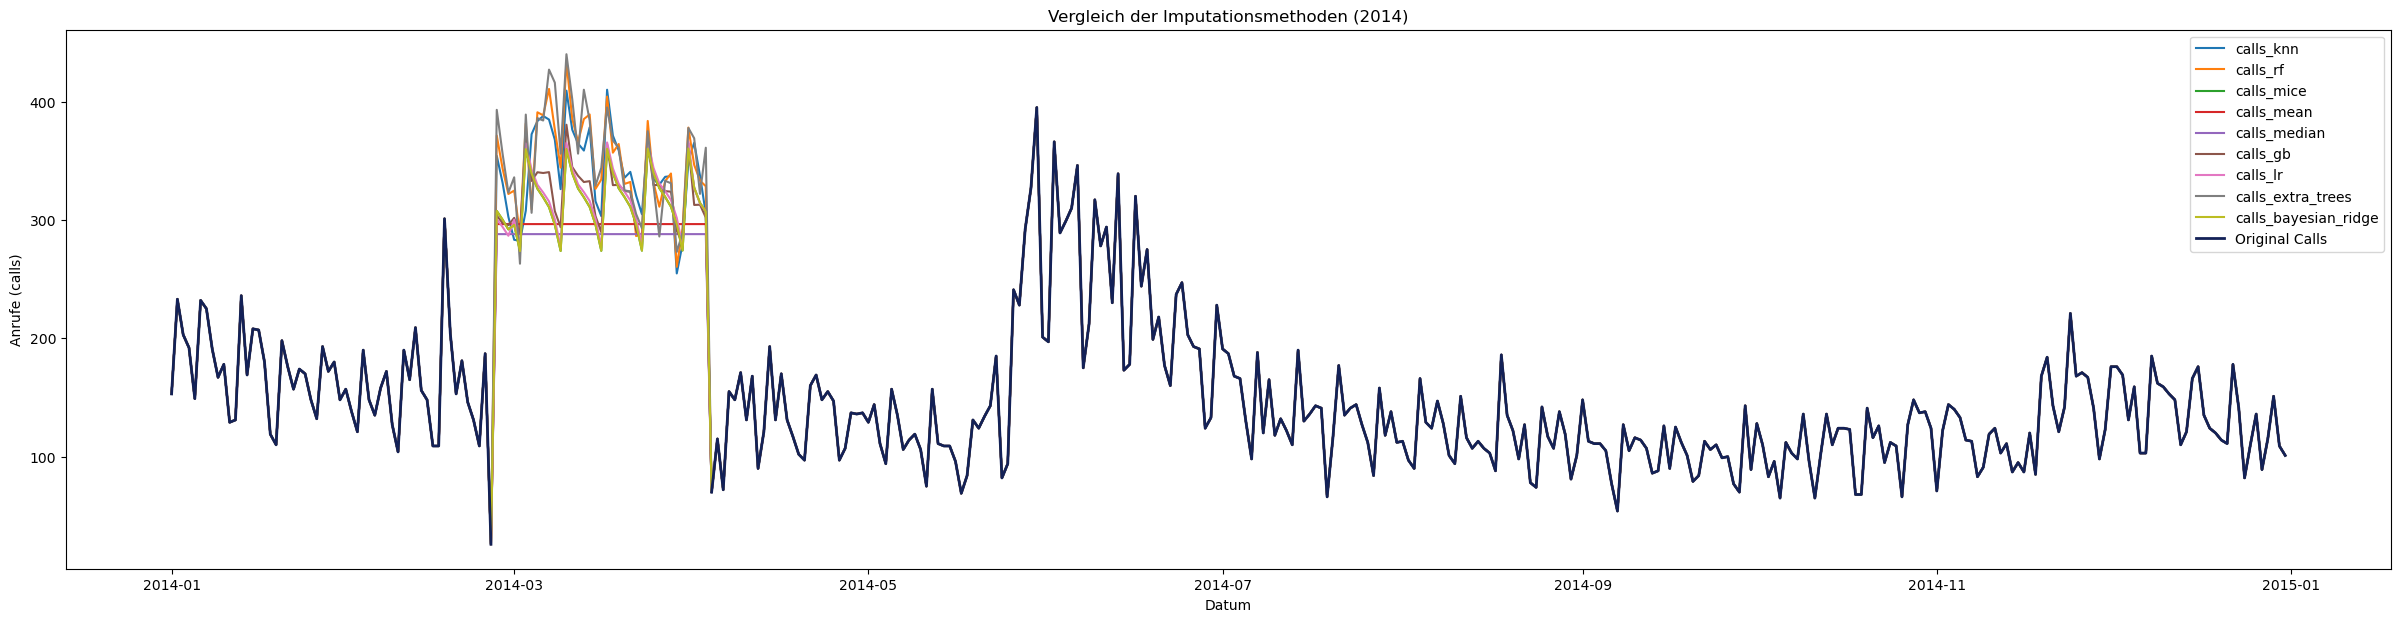

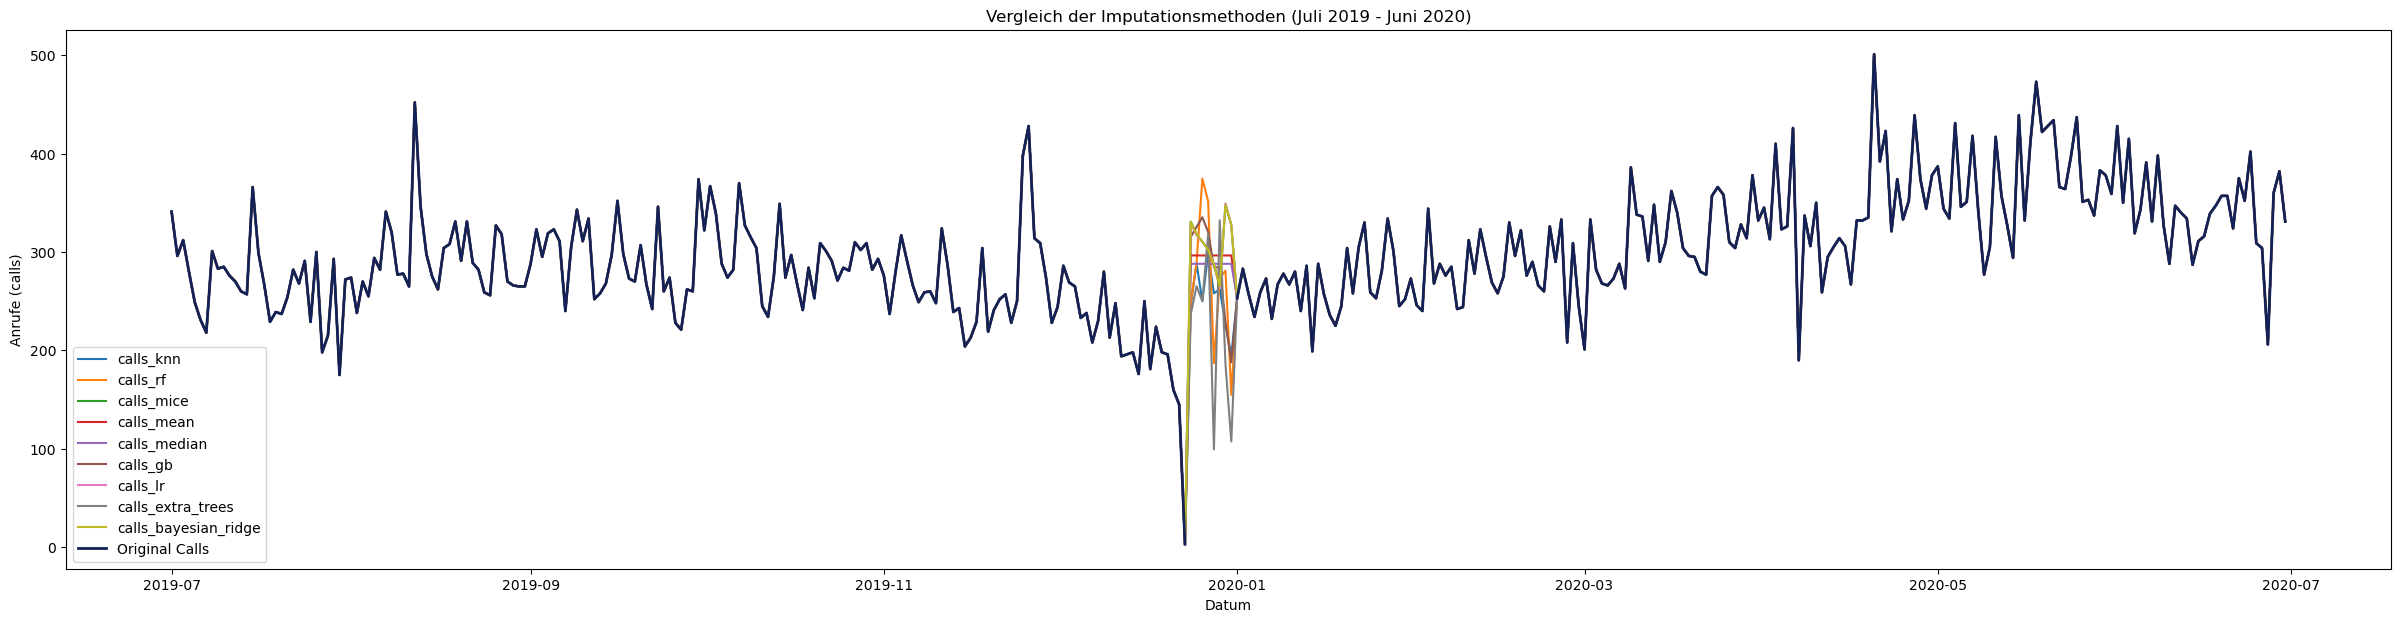

In [80]:
features = [
    'calls', 'weekday', 'month', 'weekofyear', 'season', 
    'sin_month', 'cos_month', 'sin_weekday', 'cos_weekday', 'sin_season', 
    'cos_season', 'days_to_holiday'
]
# Anwendung der Funktion auf df_daily_nomissing
df_daily_nomissing_imputed = apply_imputation_methods(df_daily_nomissing, 'calls', features)

methods = [
    'calls_knn', 'calls_rf', 'calls_mice', 'calls_mean', 'calls_median', 
    'calls_gb', 'calls_lr', 'calls_extra_trees', 'calls_bayesian_ridge'
]
plot_imputation_methods(
    df_daily_nomissing,
    methods=methods
)

Leider passt keiner der Algorithmen besonders gut für den ersten fehlenden Zeitraum. Da es so scheint, als ob die Saison ein wichtiger Faktor ist, um die Daten gut nachzubilden, werden diese nun stärker gewichtet und die Imputationsmethoden nocheinmal damit berechnet.

In [81]:
df_daily_nomissing['sin_season_weighted'] = df_daily_nomissing['sin_season'] * 2
df_daily_nomissing['cos_season_weighted'] = df_daily_nomissing['cos_season'] * 2

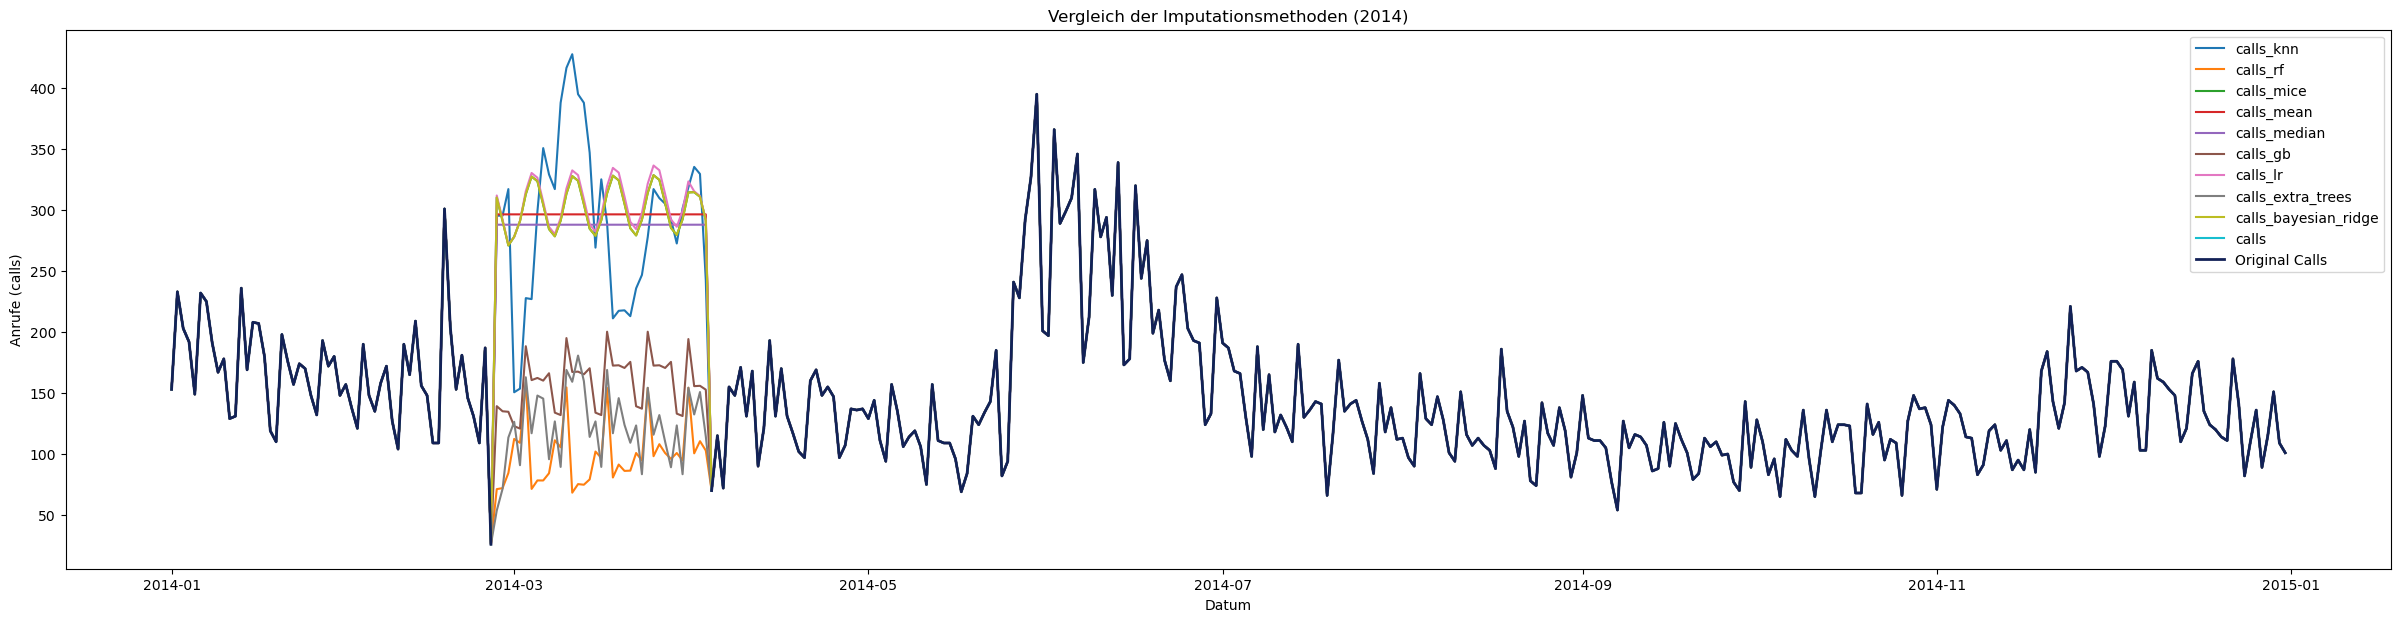

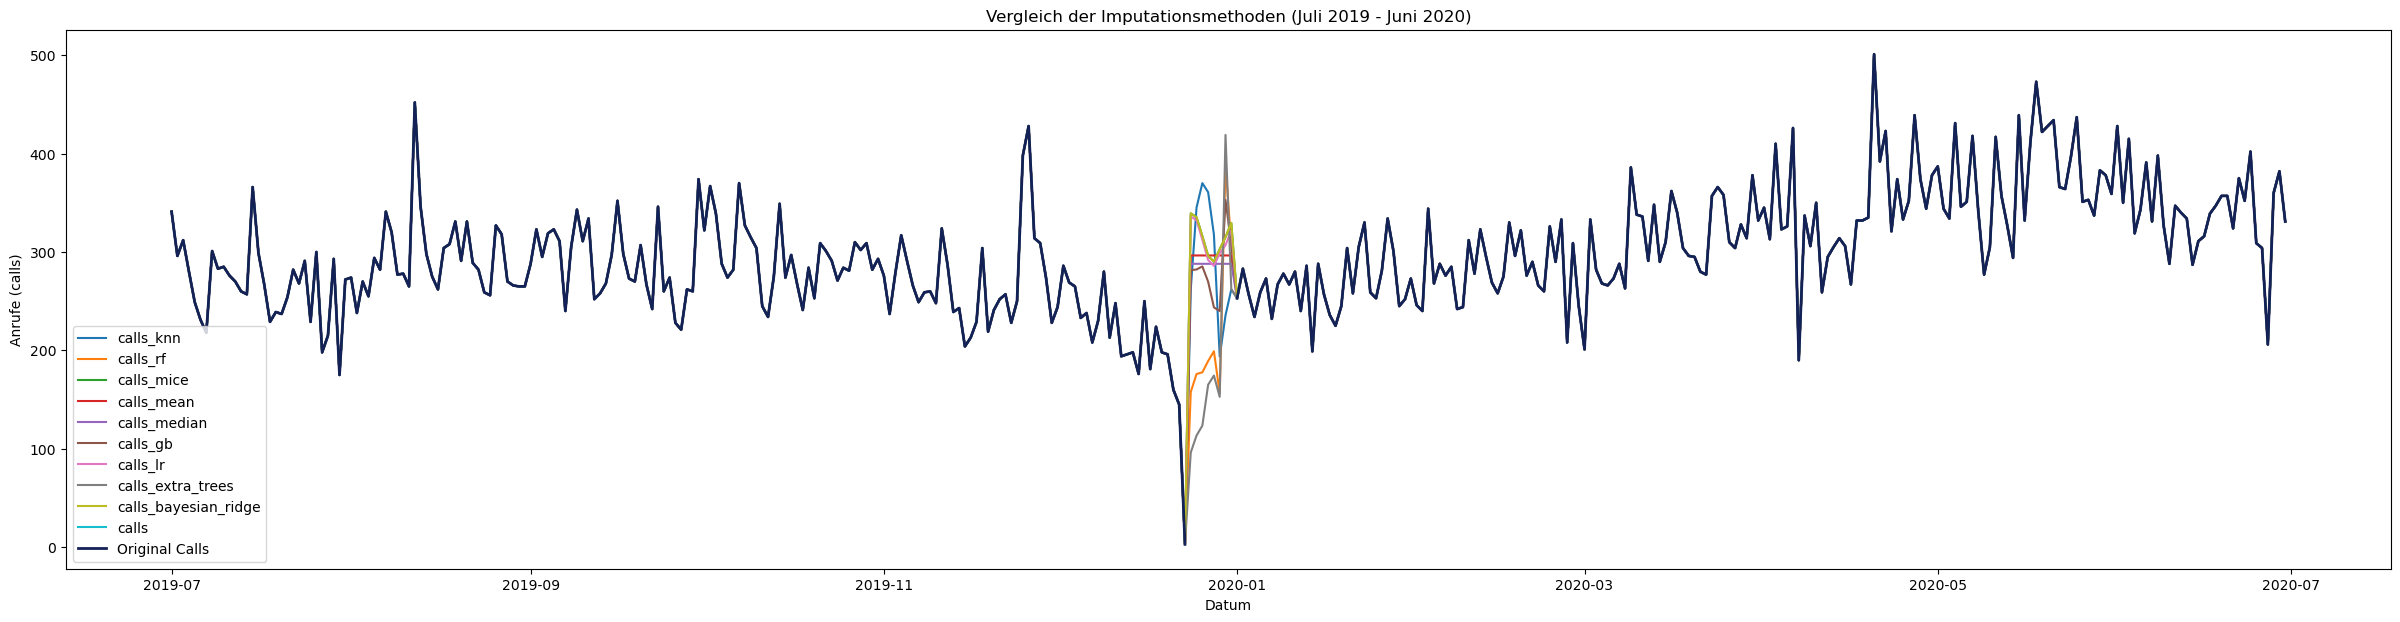

In [82]:
target_column = 'calls'
features = [
    'calls', 
#    'weekday', 
#    'month', 
    'sin_weekofyear', 
    'cos_weekofyear',
#    'season', 
    'sin_month', 
    'cos_month', 
    'sin_weekday', 
    'cos_weekday', 
    'sin_season_weighted', 
    'cos_season_weighted', 
    'days_to_holiday', 
    'year'
]
df_daily_nomissing = apply_imputation_methods(df_daily_nomissing, target_column, features)
methods = [
    'calls_knn', 'calls_rf', 'calls_mice', 'calls_mean', 'calls_median', 
    'calls_gb', 'calls_lr', 'calls_extra_trees', 'calls_bayesian_ridge', 'calls'
]
plot_imputation_methods(
    df_daily_nomissing,
    methods=methods
)

Nochmal Werte anschauen mit dem 23.12.2019 auf NaN (niedriger Wert vor zweitem fehlendem Abschnitt).

In [83]:
# Kopie des DataFrames erstellen
df_daily_nomissing_no211223 = df_daily_nomissing.copy()

# 'calls' am 23.12.2019 auf NaN setzen
df_daily_nomissing_no211223.loc[df_daily_nomissing_no211223['date'] == '2019-12-23', 'calls'] = np.nan

# Prüfen, ob die Änderung vorgenommen wurde
print(df_daily_nomissing_no211223[df_daily_nomissing_no211223['date'] == '2019-12-23'])

           date  calls  days_to_holiday  calls_ffil  calls_bfill  calls_mean  \
2182 2019-12-23    NaN                2         3.0          3.0         3.0   

      calls_extra_trees  calls_elastic_net  calls_knn  hour  ...  sin_season  \
2182                3.0                3.0        3.0     0  ...         1.0   

        cos_season  calls_rf  calls_mice  calls_median  calls_gb  calls_lr  \
2182  6.123234e-17       3.0         3.0           3.0       3.0       3.0   

      calls_bayesian_ridge  sin_season_weighted  cos_season_weighted  
2182                   3.0                  2.0         1.224647e-16  

[1 rows x 31 columns]


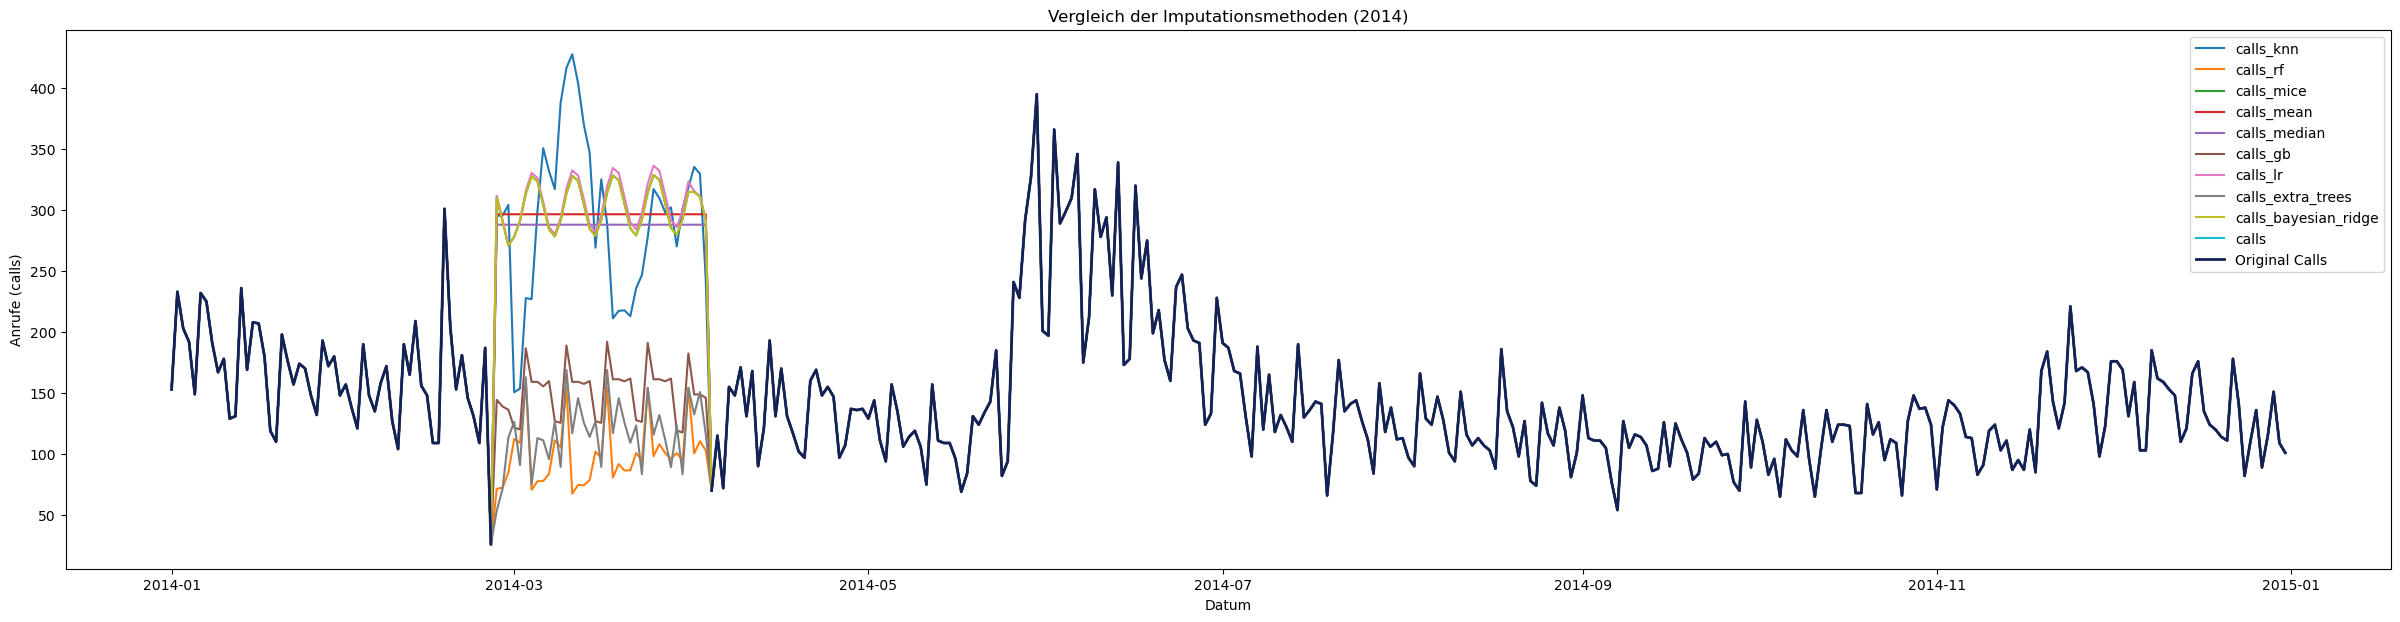

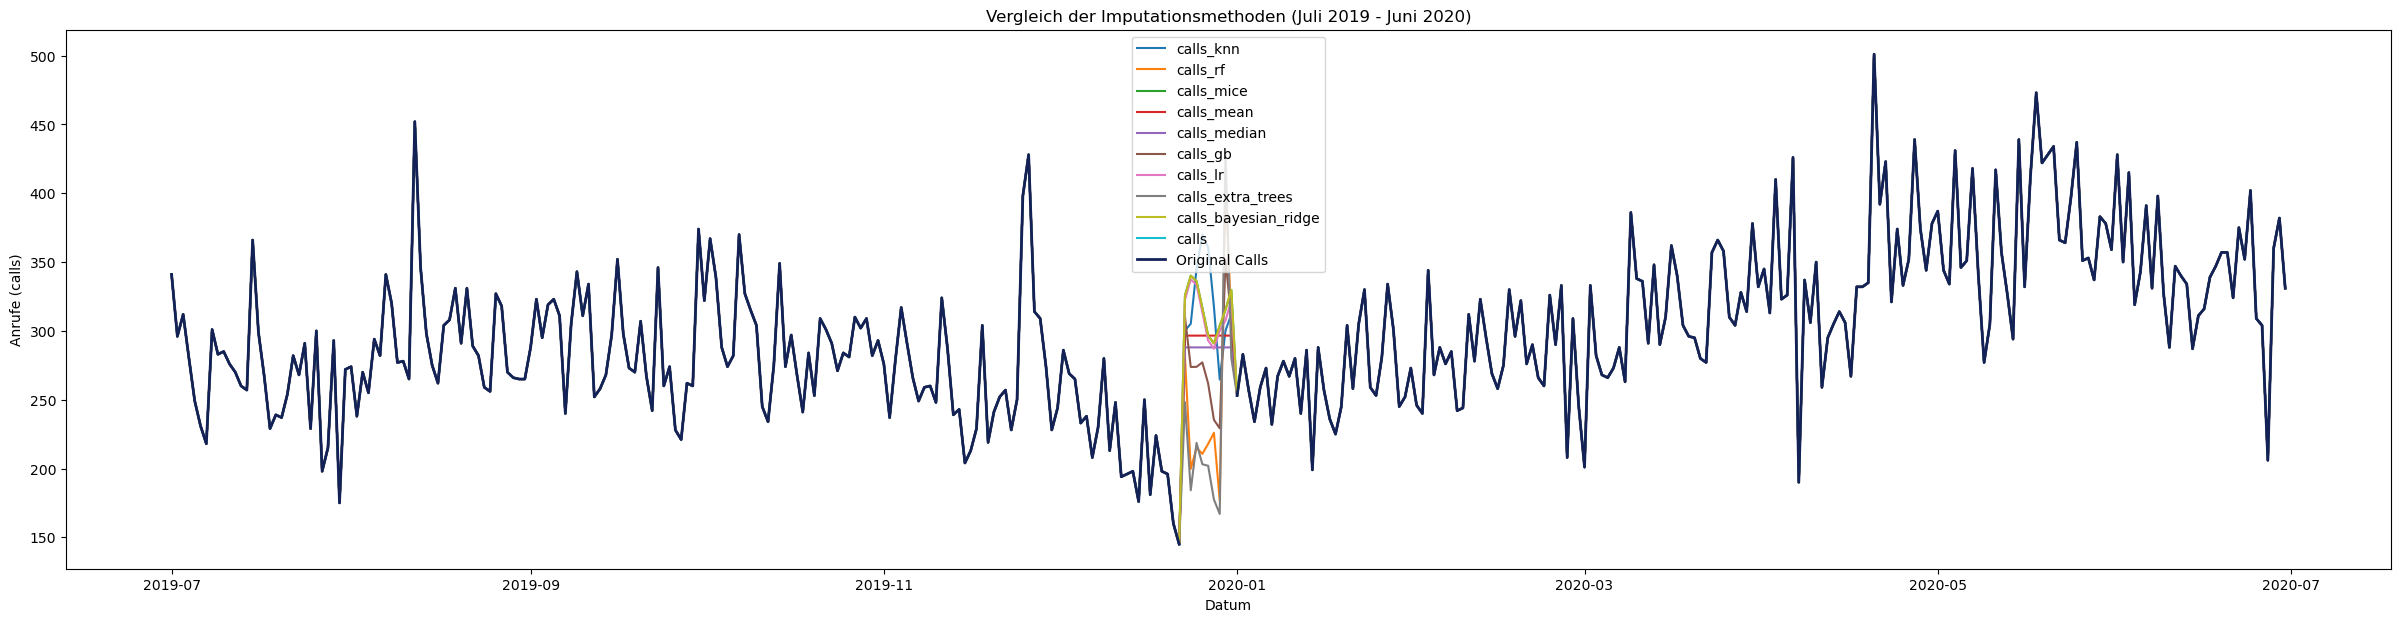

In [84]:
df_daily_nomissing_no211223 = apply_imputation_methods(df_daily_nomissing_no211223, target_column, features)
plot_imputation_methods(df_daily_nomissing_no211223, methods=methods)

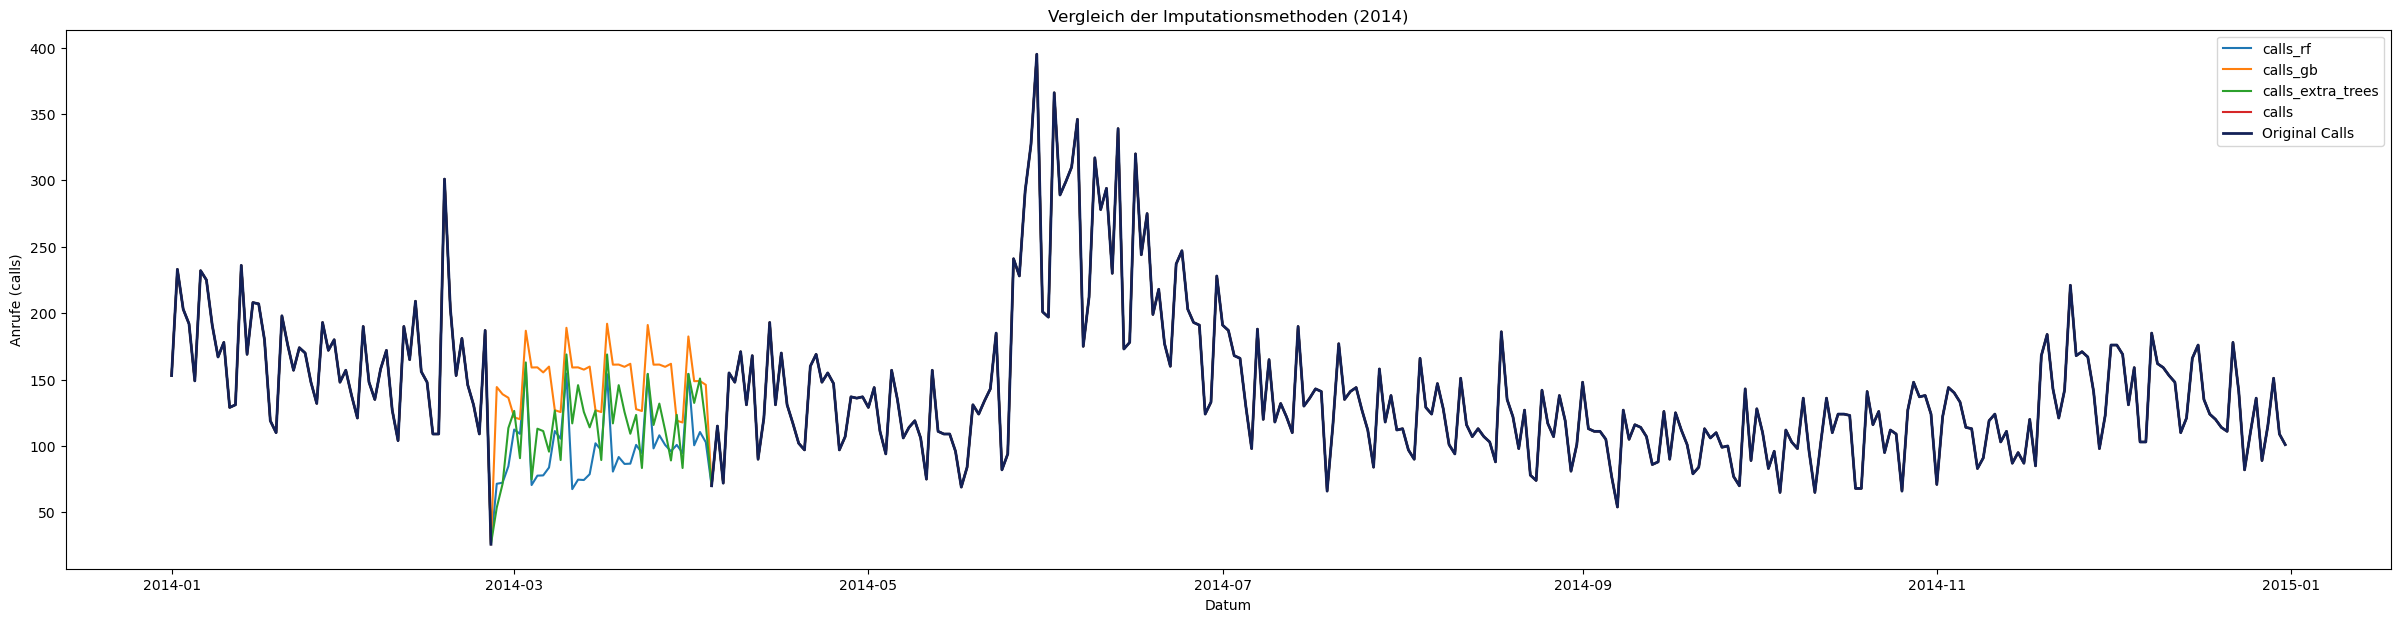

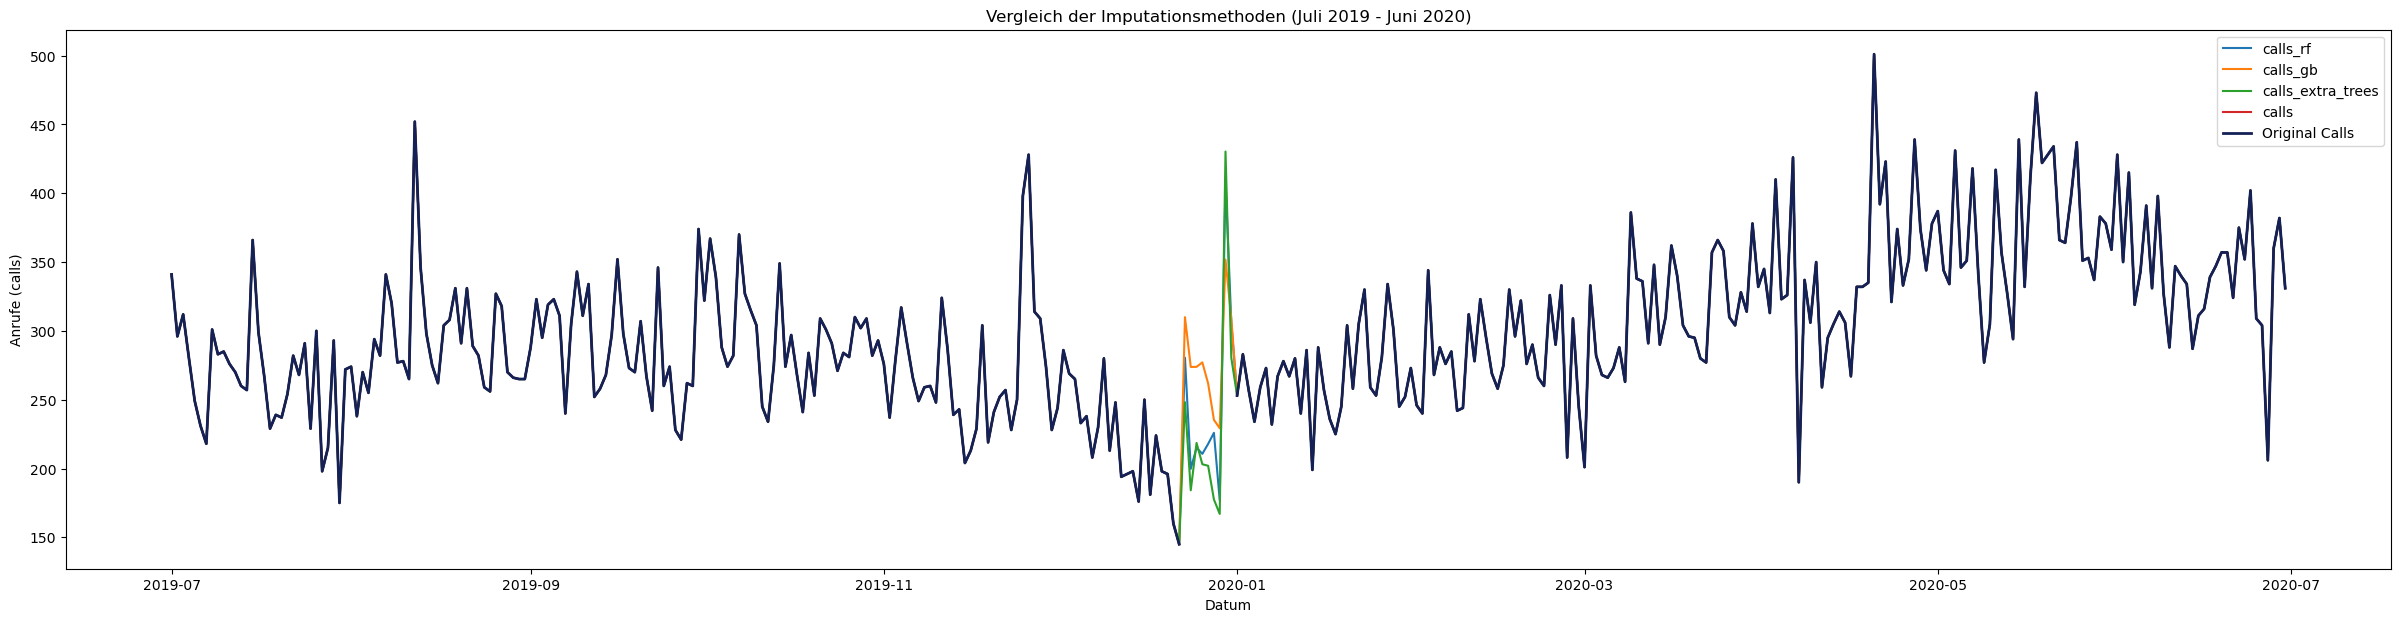

In [85]:
methods = [
    'calls_rf', 
    'calls_gb', 'calls_extra_trees', 'calls'
]
plot_imputation_methods(
    df_daily_nomissing_no211223,
    methods=methods
)

Rein optisch funktionieren die drei Methoden: RandomForestRegressor, GradientBoostingRegressor und ExtraTreesRegressor am besten. 
Nun werden die dahinterstehenden Methoden analysiert, um die passendste Methode zu finden.

## Dataframes speichern

In [86]:
data_call_all.to_csv('data_call_all.csv', index=True)
df_daily_nodupl.to_csv('df_daily.csv', index=True)
df_hourly_nodupl.to_csv('df_hourly.csv', index=True)
df_daily_nodupl_2020.to_csv('df_daily_2020.csv', index=True)
df_hourly_nodupl_2020.to_csv('df_hourly_2020.csv', index=True)
df_daily_nomissing_no211223.to_csv('df_daily_nomissing.csv', index=True)